# Исследование объявлений о продаже квартир

## Задача исследования

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир

## Описание данных

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах(м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## 1. Откроем файл с данными и изучим общую информацию. 

### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import requests

from tqdm import tqdm

import warnings
warnings.simplefilter('ignore')

sns.set_theme(style="darkgrid")
tqdm.pandas()

### Обзор данных

In [2]:
data = ['real_estate_data.csv']
path = open('link.txt', 'r').readline()

for file in data:
    try:
        response = requests.get(path + file)
        response.raise_for_status()
    except requests.exceptions.HTTPError:
        path = '/datasets/'

df = pd.read_csv(path + data[0], sep='\t')

In [3]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Заметим, что:
* `first_day_exposition` - содержит в себе дату и время, но хранится, как строка,
* `last_price` - не целое число, зачем считать копейки, когда цена на миллионы?
* `floors_total` - количество этажей не целое? Наверное, это квартиры в строющемся доме!1 :)
* `is_apartment` - из булевой переменной из-за пропусков превартилась в строку,
* `balcony` - количество балконов тоже из-за пропусков теперь не целое число,
* `airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest` - уже в метрах, зачем нам еще тип float? Не будем же измерять остаток расстояния линейкой!
* `parks_around3000, ponds_around3000` - количество тоже должно быть в целых числах, мы же не можем сказать: "Тут рядом 2,5 парка!"
* `days_exposition` - превратилось в тип float из-за пропусков!


### Пропуски

Судя по `info()` в таблице есть пропуски.

Посчитаем количество пропущенных значений и их % соотношение ко всем записям:

In [6]:
def null_values(data):
    return (data
         .isnull()
         .sum()
         .to_frame(name = 'count_null_values')
         .query('count_null_values != 0')
         .assign(percent = lambda x: (x['count_null_values']/len(data)))
         .sort_values(by = 'count_null_values', ascending = False)
         .style.format({'percent' : '{:.1%}'})
    )

In [7]:
null_values(df)

,count_null_values,percent
is_apartment,20924,88.3%
parks_nearest,15620,65.9%
ponds_nearest,14589,61.6%
balcony,11519,48.6%
ceiling_height,9195,38.8%
airports_nearest,5542,23.4%
cityCenters_nearest,5519,23.3%
parks_around3000,5518,23.3%
ponds_around3000,5518,23.3%
days_exposition,3181,13.4%


Ничего себе! В лидерской 3-ки пропусков у всех больше 50% пропущенных значений, а первое место у апартаментов, там целых 88% пропущенных значений. 

### Дубликаты

Посмотрим, как обстоят дела с дубликатами:

In [8]:
df.duplicated().sum()

0

Как говорится: 
>Встали цифры, как отряд,
в дружный числовой свой ряд.
Первой по порядку роль
нам сыграет цифра… **0**!"

Дубликатов нет, отлично!

### Аномальные данные

Сделаем таблицу медианы, минимальных и максимальных значений, чтобы найти аномальные данные:

In [9]:
(df
    .describe()
    .query('index in ["50%", "min", "max"] ')
    .transpose()
)

,min,50%,max
total_images,0.0,9.00,50.0
last_price,12190.0,4650000.00,763000000.0
total_area,12.0,52.00,900.0
rooms,0.0,2.00,19.0
ceiling_height,1.0,2.65,100.0
floors_total,1.0,9.00,60.0
living_area,2.0,30.00,409.7
floor,1.0,4.00,33.0
kitchen_area,1.3,9.10,112.0
balcony,0.0,1.00,5.0


Первое, что бросается в глаза, так это:
* last_price - максимальная цена 763 млн., когда медиана 4 миллиона. Бывает конечно, но нужно перепроверить.
* total_area - площадь квартиры около 900 кв. м?
* rooms - есть квартиры без комнат и с 19 комнатами,
* ceiling_height - высота потолка бывает как 1 м, так 100 метров! (возможно, продают какой-нибудь завод :)
* living_area - от 2 кв. метров до почти 410, при медиане 30!
* airports_nearest - 0 м до аэропорта!
* parks_nearest - 1 м. до парка?
* days_exposition - от публикации до снятия как 1, так и 1580 дней... возможно ли такое?

### Вывод

Изучив данные, можно сказать, что имеется очень большой процент пропусков, отсутствуют дубликаты и есть проблемы с аномальными данными.

## 2. Предобработка данных

Заполним, по возможности, пропущенные значения в данных.

Перед этим создадим функцию, которая подсчитает заодно сколько памяти мы сэкономили после преобразования типов:

In [10]:
def mem_usage(data):
    # проверим, что передаем DataFrame
    if isinstance(data, pd.DataFrame):
        usage_b = data.memory_usage(deep=True).sum()
    # иначе это Series
    else:
        usage_b = data.memory_usage(deep=True)
    # переведем в Мб
    usage_mb = usage_b / 1024 ** 2
    return f"{usage_mb:03.2f} MB"

Пропущенные значения в `airports_nearest` заполним 0, т.к. скорее всего аэропортов поблизости нет и их не указали, а сами значения можно хранить в int, т.к. это целое расстояние в метрах:

In [11]:
df['airports_nearest'] = df['airports_nearest'].fillna(0)

In [12]:
df['airports_nearest'] = df['airports_nearest'].astype(int)

Например, в `balcony`, если человек не указал количество балконов, скорее всего их нет и можно заполнить такие значения тоже 0:

In [13]:
df['balcony'] = df['balcony'].fillna(0)

А сам столбец преобразовать в int, т.к. тип float нам абсолютно ни к месту:

In [14]:
df['balcony'] = df['balcony'].astype(int)

Значие высоты потолка потребуется нам в исследовании, поэтому заполним пропущенные данные медианой, чтобы не учитывать выбросы:

In [15]:
median_ceiling_height = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(median_ceiling_height)

Тип данных лучше оставить float, т.к. встречаются значения вида: 2.5 м, 3.5 м и т.д. Будет неправильным их преобразовывать в int, тем самым округляя. 

В столбце `cityCenters_nearest` пропущенные значения заполним маркером, в связи с тем, что точно восстановить данные не получится. Посмотрим, какое максимальное значение уже есть:

In [16]:
df['cityCenters_nearest'].max()

65968.0

Как видим, максимальное значение 65968 м, тогда маркером можно выбрать число заведомо большее, например, 99 999 м.

In [17]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(99999)

Изменим теперь тип данных с float на int:

In [18]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype(int)

Пропуски в `days_exposition` порядка 13%, что не очень хорошо. 

Заполним эти пропуски наибольшим значением, чтобы потом можно было легко определить эти значения:

In [19]:
df['days_exposition'] = df['days_exposition'].fillna(99999)

In [20]:
df['days_exposition'] = df['days_exposition'].astype(int)

Столбец `first_day_exposition` содержит в себе дату размещения объявления, исправим тип данных с строки на date_time:

In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

`floors_total` трудно заполнить как-либо средним значением, тем более, там не так много пропусков. Заполним значения маркером, лучше всего взять наибольшее число этажей, например 100, но для этого посмотрим, максимальное значение:

In [22]:
df['floors_total'].max()

60.0

In [23]:
df['floors_total'] = df['floors_total'].fillna(100)

Изменим тип данных с float на int:

In [24]:
df['floors_total'] = df['floors_total'].astype(int)

### Подсчет расходуемой памяти

После преобразования к `int` посмотрим размер используемой памяти всех столбцов, которые содержат целочисленные значения:

In [25]:
df_int = df.select_dtypes(include=['int'])
print(mem_usage(df_int))

0.45 MB


Как можно заметить, данные с целочисленными значениями содержат только положительные числа, поэтому можно оптимизировать используемое место, преобразовав все к типу `unsigned` - безнаковому типу данных:

In [26]:
converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')

In [27]:
converted_int.dtypes

floors_total            uint8
balcony                 uint8
airports_nearest       uint32
cityCenters_nearest    uint32
days_exposition        uint32
dtype: object

Посмотрим занимаемый объем памяти:

In [28]:
print(mem_usage(converted_int))

0.32 MB


Сравним полученные результаты:

In [29]:
print("Обычный тип int: ", mem_usage(df_int))
print("Тип unsigned int: ", mem_usage(converted_int))

Обычный тип int:  0.45 MB
Тип unsigned int:  0.32 MB


В результате мы выиграли порядка 75% в потреблении памяти.

Выполним аналогичные действия для типа `float`:

In [30]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(df_float))
print(mem_usage(converted_float))

1.63 MB
0.81 MB


Оптимизация составила около 50%

### Оптимизация всего DataFrame

Посмотрим, как это отразится на всем DataFrame:

In [31]:
mem_usage(df)

'6.06 MB'

In [32]:
df_optimized = df.copy()
df_optimized[converted_int.columns] = converted_int
df_optimized[converted_float.columns] = converted_float

In [33]:
mem_usage(df_optimized)

'5.11 MB'

Выигрыш составил около 30 % - уже неплохо!

Перезапишем наш df более оптимизированным: 

In [34]:
df = df_optimized

Для других типов данных нет подходящего значения на замену. В этом случае правильнее оставить эти значения пустыми.

### Вывод

Пропущенные значение были заменены, а столбцы преобразованы к нужному типу данных.

## 3. Посчитаем и добавим в таблицу

Посчитаем цену квадратного метра как: общая стоимость недвижимости разделенная на общую площадь:

In [35]:
df['price_metr'] = round((df['last_price'] / df['total_area']), 0)

Преобразуем сразу к целому числу:

In [36]:
df['price_metr'] = df['price_metr'].astype(int)

Добавим так же столбцы: день недели, месяц и год публикации:

In [37]:
df['year'] = df['first_day_exposition'].dt.year

In [38]:
df['month'] = df['first_day_exposition'].dt.month

In [39]:
df['day_name'] = df['first_day_exposition'].dt.weekday.replace({0: 'ПН', 1: 'ВТ', 2: 'СР', 3: 'ЧТ', 4: 'ПТ', 5:'СБ', 6: 'ВС'})

Создадим также столбцы, которые в зависимости от этажа будут присваивать значения: первый, последний, другой:

In [40]:
def set_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [41]:
df['floor_type'] = df.progress_apply(set_floor, axis = 1)

100%|█████████████████████████████████████████████████████████████████████████| 23699/23699 [00:00<00:00, 27383.05it/s]


Найдем соотношение жилой площади и общей площади, а так же соотношение площади кухни и общей, для этого разберемся с пропущенными значениями.

Заполним пропуски в `living_area` используя `total_area` и медианное значение жилой площади по комнатам.

Сделаем группировку данных по комнатам и выведем медиану средней жилой площади и кухни в зависимости от количества комнат:

In [42]:
pivot_rooms_living_area = df.pivot_table(index = 'rooms', values = ['living_area', 'kitchen_area'], aggfunc=['count','median'])

In [43]:
pivot_rooms_living_area.columns = ['kitchen_area_count', 'living_area_count', 'kitchen_area_median', 'living_area_median'] 

In [44]:
pivot_rooms_living_area

,kitchen_area_count,living_area_count,kitchen_area_median,living_area_median
rooms,,,,
0,0,183,NaN,18.000000
1,7213,7388,9.040000,17.600000
2,7286,7296,8.800000,30.500000
3,5380,5366,9.500000,45.000000
4,1081,1089,11.100000,63.599998
5,285,292,15.100000,91.785004
6,97,99,19.500000,123.900002
7,52,53,20.000000,145.000000
8,9,12,25.000000,161.000000


Заполним пропуски в `living_area` согласно количеству комнат:

In [45]:
df['living_area'] = df['living_area'].fillna(0)

In [46]:
def fill_living_area(row):
    if row['living_area'] == 0.0:
        return pivot_rooms_living_area.loc[row['rooms'], 'living_area_median']
    return row['living_area']

In [47]:
df['living_area'] = df.progress_apply(fill_living_area, axis = 1)

100%|█████████████████████████████████████████████████████████████████████████| 23699/23699 [00:00<00:00, 26525.42it/s]


Оставшиеся пропуски в `kitchen_area` заполним как разницу между `total_area` и `living_area`:

In [48]:
def fill_kitchen_area(row):
    if row['kitchen_area']:
        return row['total_area'] - row['living_area']
    return row['kitchen_area']

In [49]:
df['kitchen_area'] = df.progress_apply(fill_kitchen_area, axis = 1)

100%|█████████████████████████████████████████████████████████████████████████| 23699/23699 [00:00<00:00, 25200.59it/s]


Проверим, что все важные пропуски исправлены:

In [50]:
null_values(df)

,count_null_values,percent
is_apartment,20924,88.3%
parks_nearest,15620,65.9%
ponds_nearest,14589,61.6%
parks_around3000,5518,23.3%
ponds_around3000,5518,23.3%
locality_name,49,0.2%


После заполнения пропусков найдем соотношение жилой площади к общей площади и площади кухни к общей:

In [51]:
df['living_to_total'] = df['living_area'] / df['total_area']

In [52]:
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

## 4. Проведем исследовательский анализ данных и выполним инструкции:

Посмотрим на минимальное, максимальное и медиану у параметров: площадь, цена, число комнат, высота потолков:

In [53]:
(df[['total_area', 'last_price', 'rooms', 'ceiling_height']]
    .describe()
    .query('index in ["50%", "min", "max"] ')
    .transpose()
)

,min,50%,max
total_area,12.0,52.00,900.0
last_price,12190.0,4650000.00,763000000.0
rooms,0.0,2.00,19.0
ceiling_height,1.0,2.65,100.0


Посмотрим гистрограммы и диаграммы размаха для площади, цены, числа комнат и высоты потолков, чтобы графики были читаемые, ограничим диапазон размахом "усов":

In [54]:
def det_whiskers(data, column):
    stat = data[column].describe()
 
    # межквартильный размах
    iqr = stat[6] - stat[4]
 
    # левый и правый "ус"    
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)
 
    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
 
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
 
    return [left_whisker, right_whisker]

In [55]:
def draw_plot(data, columns_dict, _grid = False, _figsize = (15,4)):
    for column, size_data in columns_dict.items():
        f, (ax1, ax2) = plt.subplots(1, 2, figsize = _figsize, dpi=180)
        (data.plot(y=column,
                  kind='hist',
                  range=(det_whiskers(data, column)[0], det_whiskers(data, column)[1]),
                  bins=30,
                  ax = ax1,
                  grid = _grid
        ))
        ax1.set_xlabel(column + ', ' + size_data)
        ax1.set_ylabel('frequency, number of ads')
        ax1.title.set_text('histogram')
        #plt.show()

        data.boxplot(column, ax = ax2, showfliers=False)
        ax2.set_ylabel(size_data)
        plt.title('box plot'),
        plt.show()

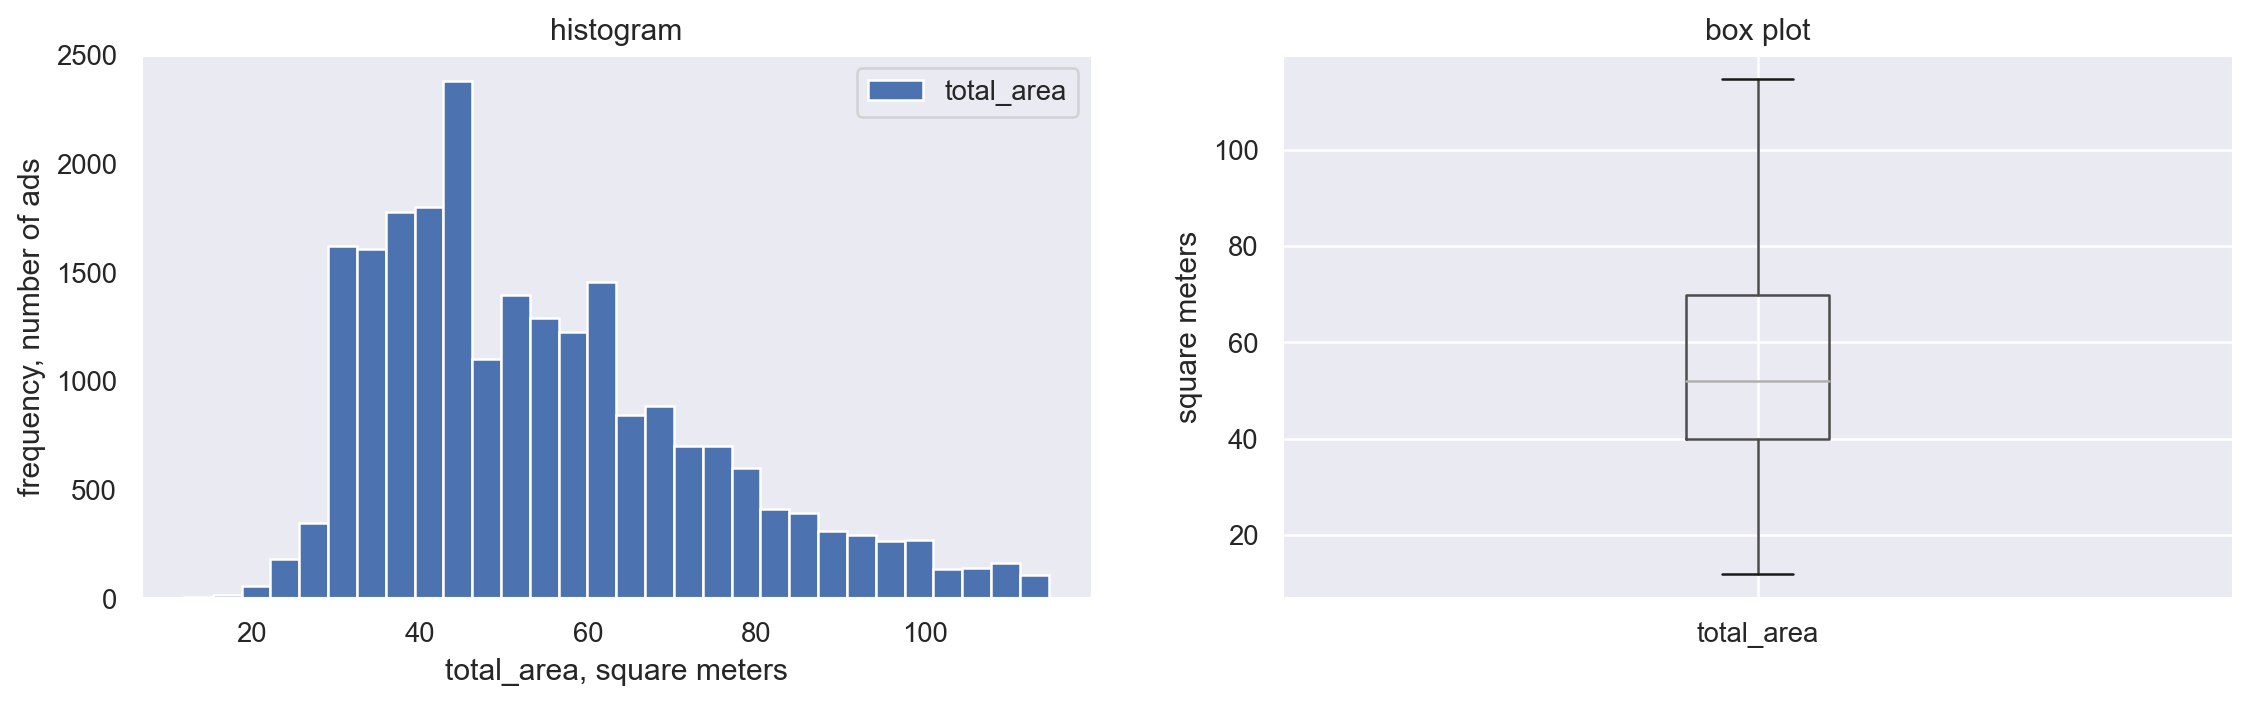

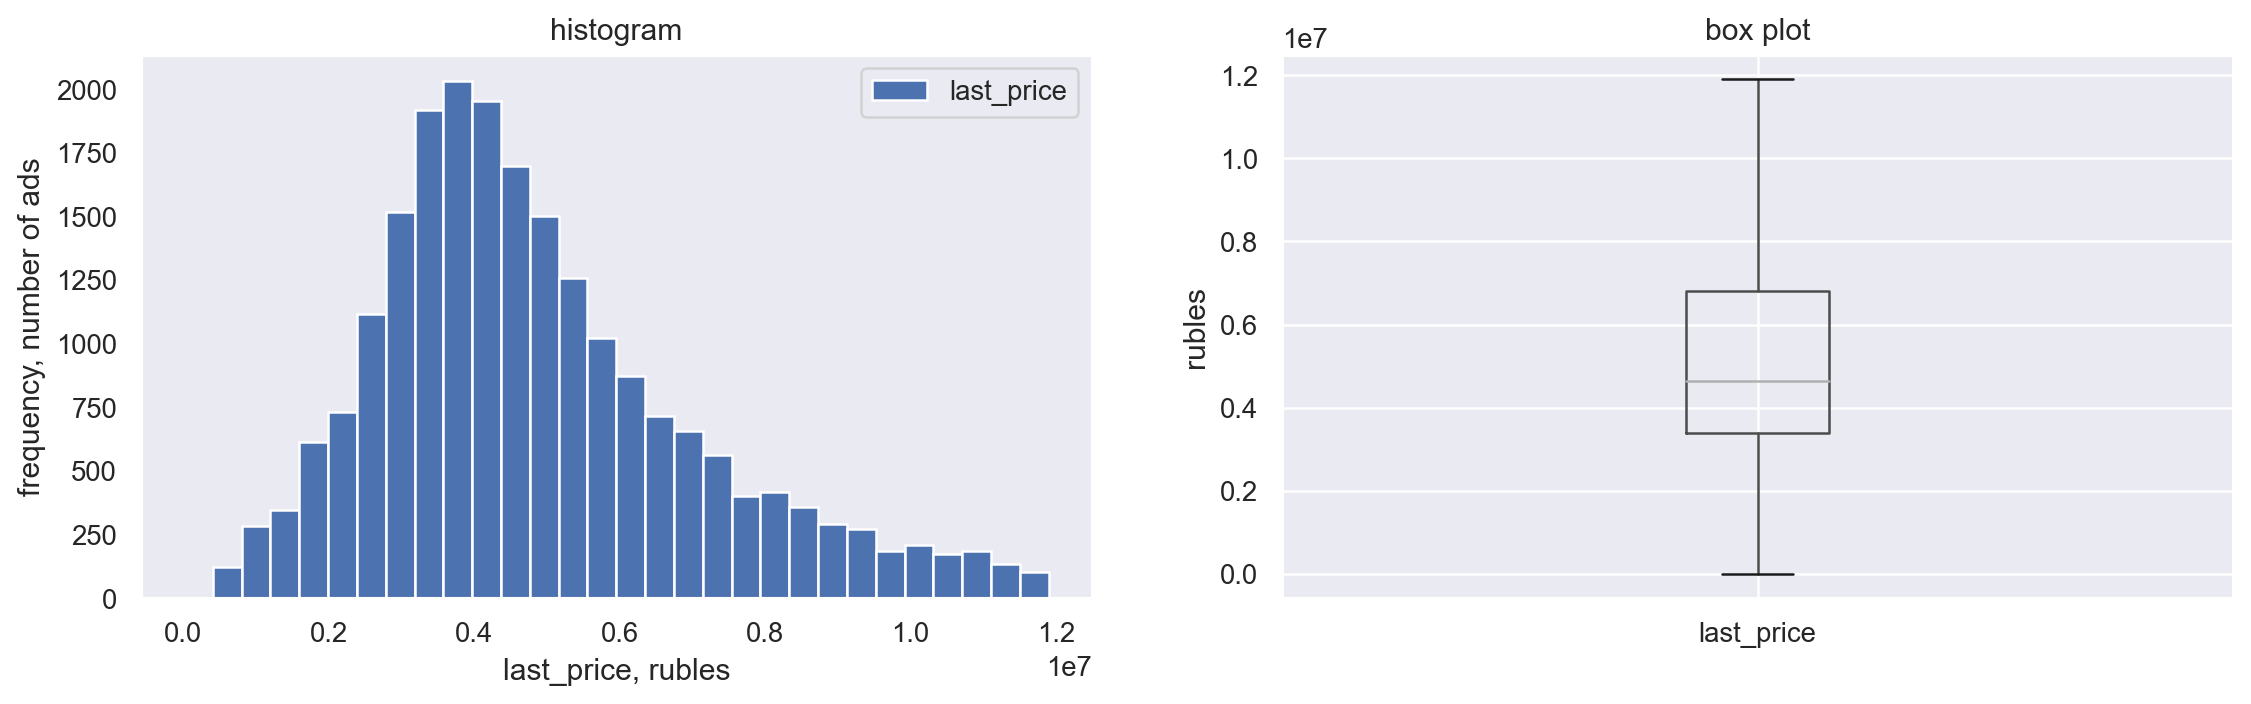

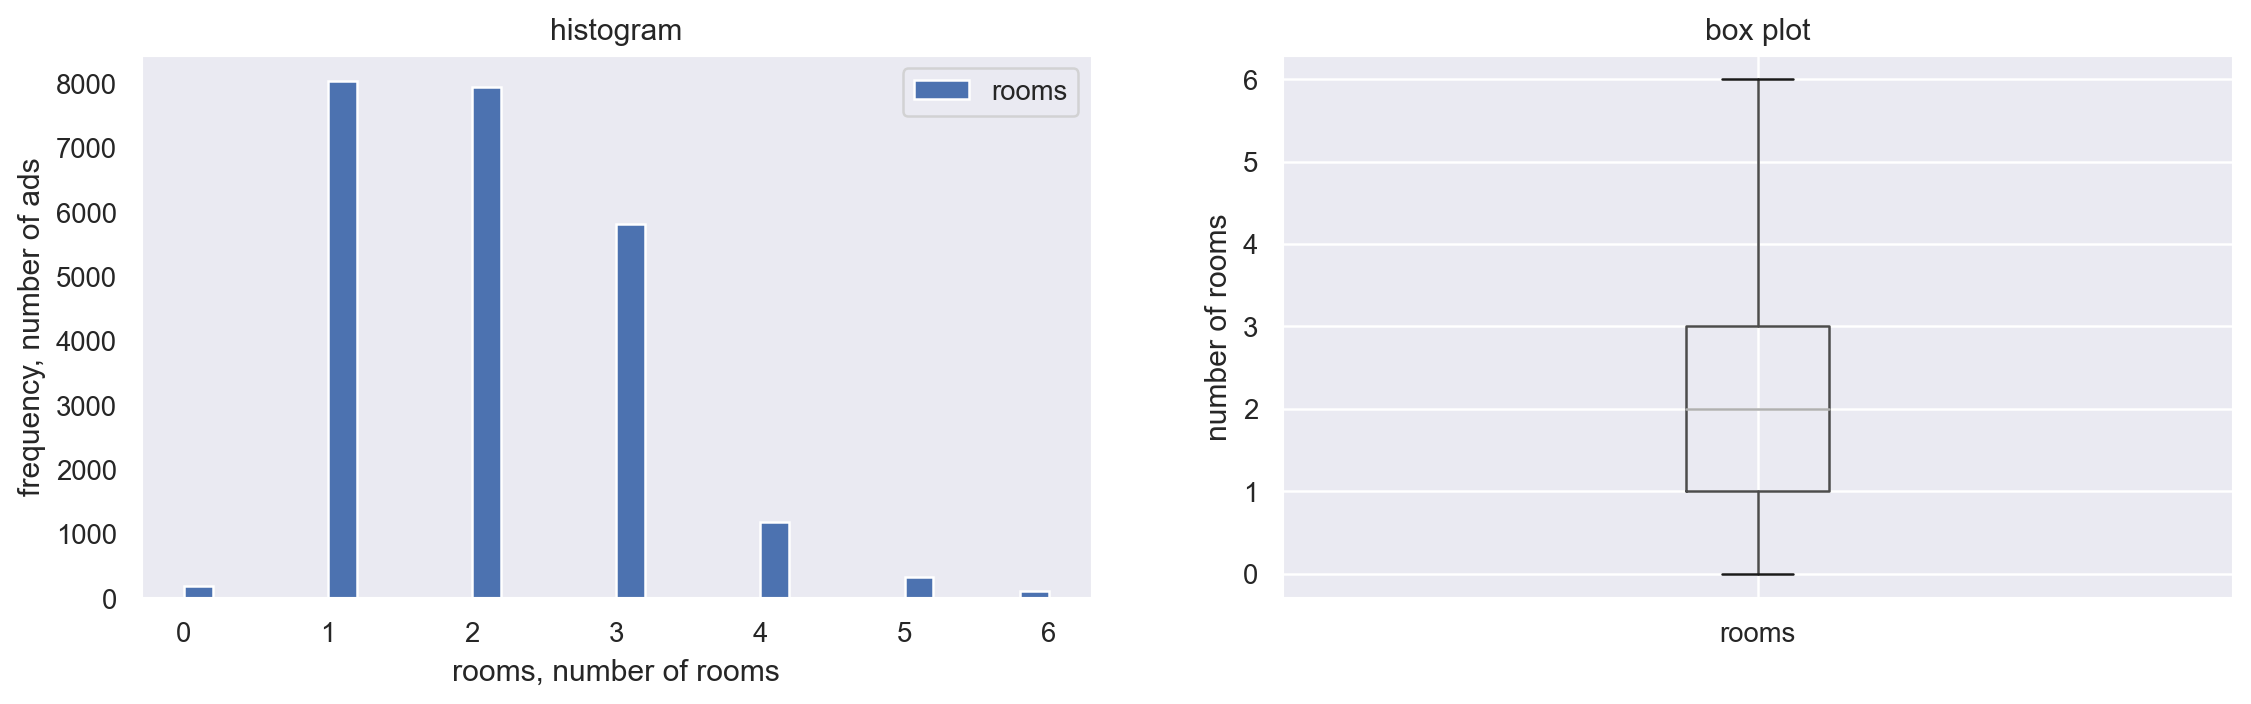

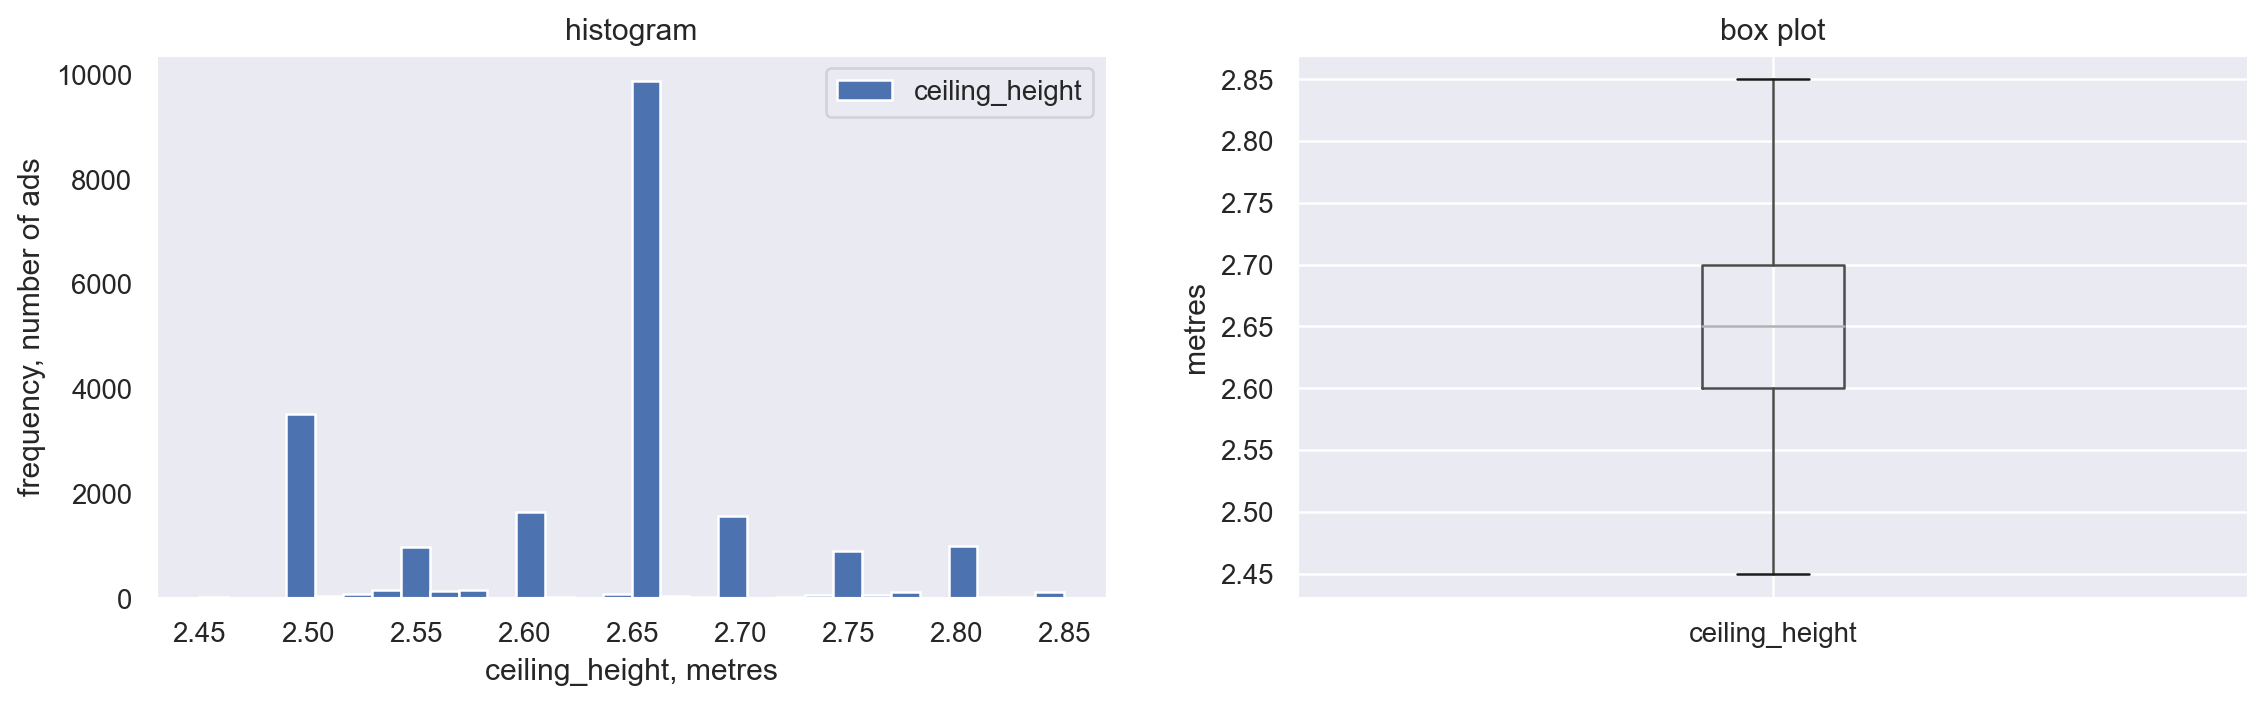

In [56]:
draw_plot(df, {'total_area':'square meters', 'last_price': 'rubles', 'rooms': 'number of rooms', 'ceiling_height': 'metres'})

Изучим время продажи квартиры:

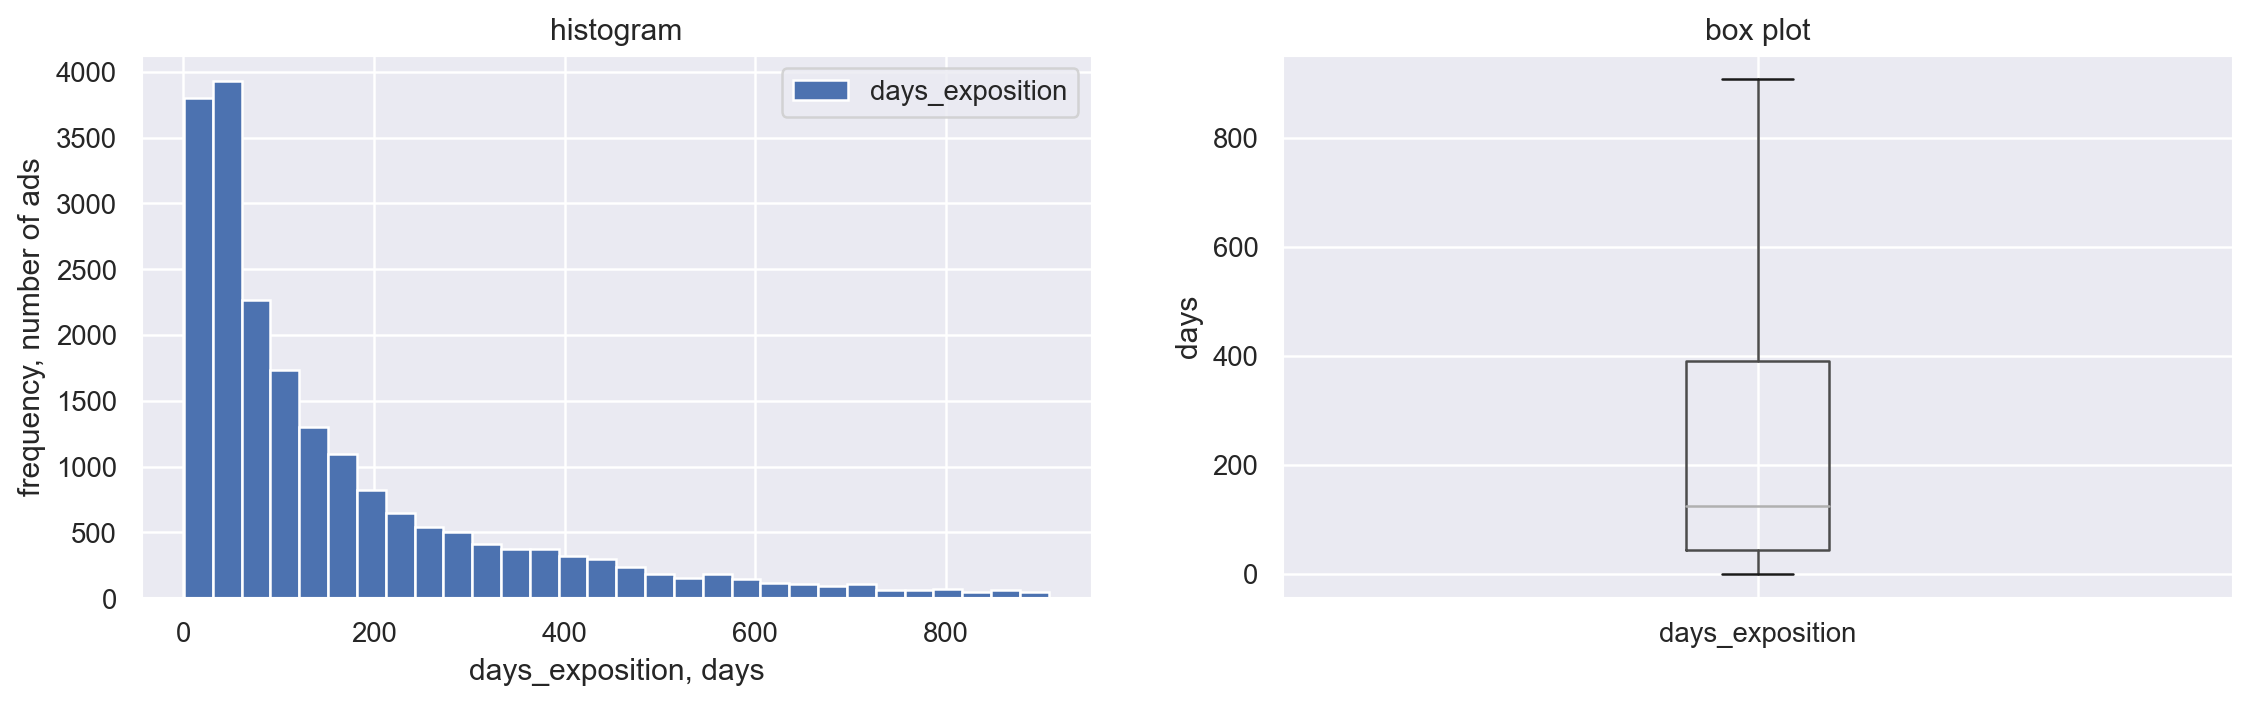

In [57]:
draw_plot(df, {'days_exposition': 'days'}, _grid = True)

Посчитаем среднее (без учета выбросов) и медиану для времени продажи квартиры:

In [58]:
df.query('(days_exposition >= @det_whiskers(@df, "days_exposition")[0]) and (days_exposition <= @det_whiskers(@df, "days_exposition")[1])')['days_exposition'].mean()

162.57436126851576

In [59]:
df['days_exposition'].median()

124.0

Как видим из значений, среднее время продажи квартиры порядка 4-5 месяцев.

Возьмем за быструю продажу квартиры, проданные менее чем за 45 дней, а за длительную продажу квартиры, которые были проданы спустя 390 дней:

In [60]:
df['days_exposition'].describe()

count    23699.000000
mean     13578.981898
std      34028.724942
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max      99999.000000
Name: days_exposition, dtype: float64

Отфильтруем редкие и выбывающие значения, оставшиеся добавим в новые столбцы вида **column_normalize**:

In [61]:
normal_filter = {'total_area':[], 'last_price':[], 'rooms':[], 'ceiling_height':[], 'days_exposition':[]}

for key, value in normal_filter.items():
    normal_filter[key] = det_whiskers(df, key)
    
for column in normal_filter:
    df[column + '_normalize'] = df.loc[(df[column] >= normal_filter[column][0]) & ((df[column] <= normal_filter[column][1])), column]

In [62]:
dict_of_normalize_columns = {'total_area_normalize':'square meters', 'last_price_normalize': 'rubles', 'rooms_normalize': 'number of rooms', 'ceiling_height_normalize': 'metres'}

Удалим значения, которые после нормализации превартились в Nan:

In [63]:
df = df.dropna(subset=dict_of_normalize_columns).reset_index(drop=True)

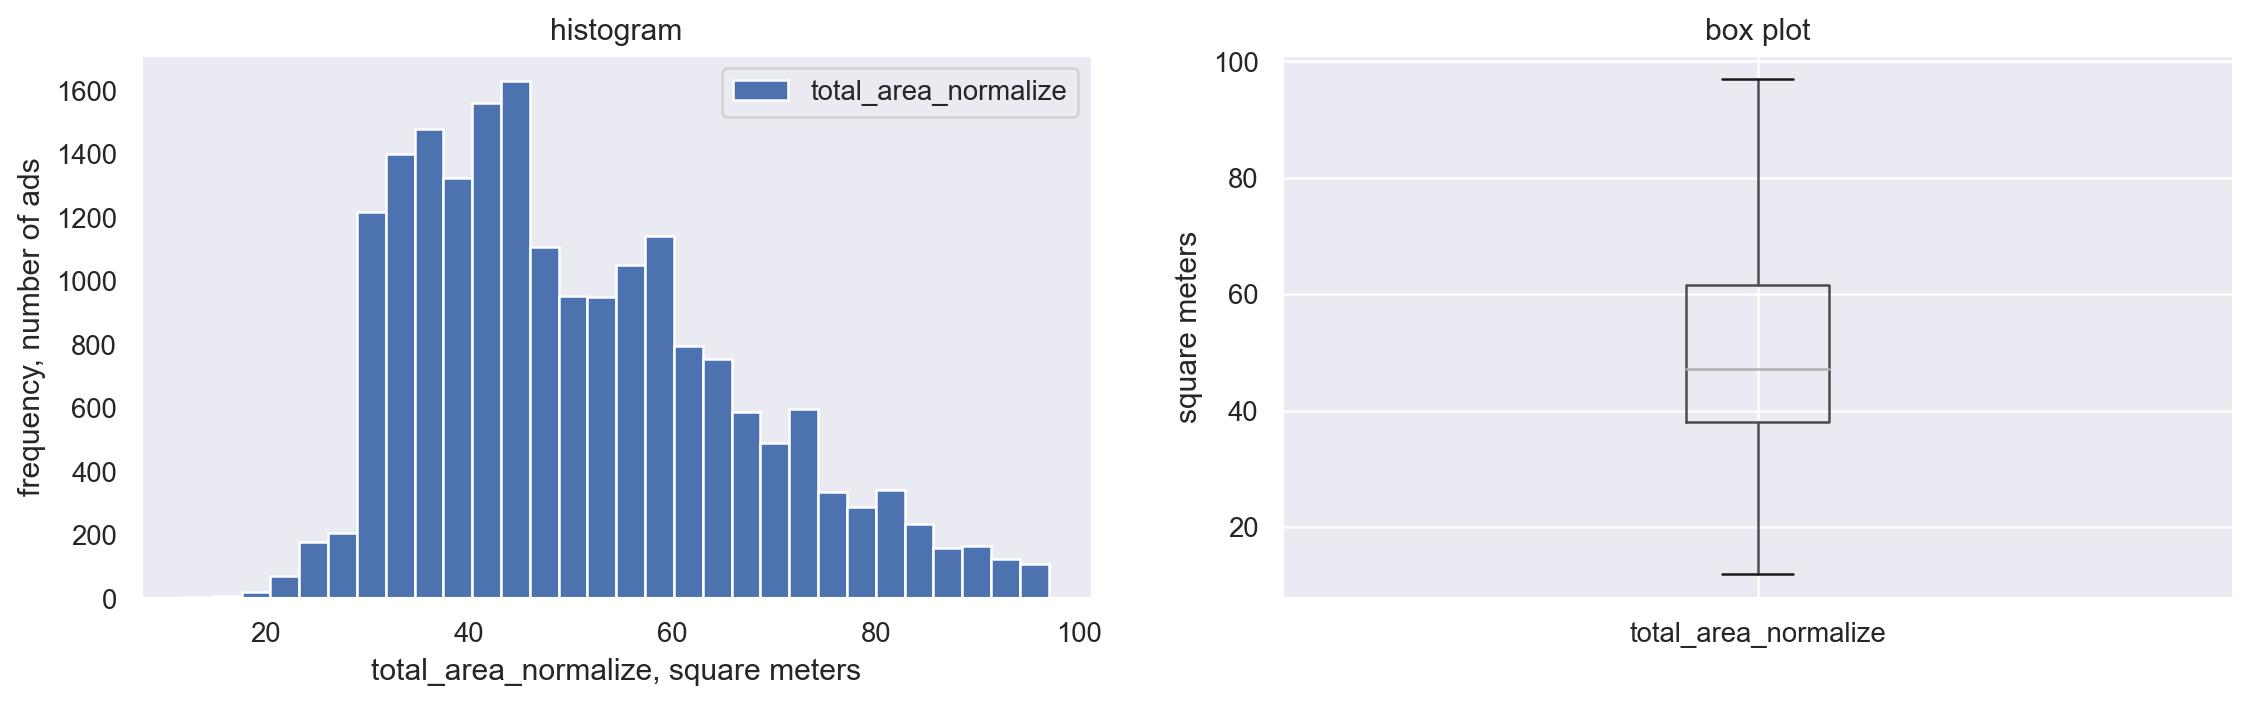

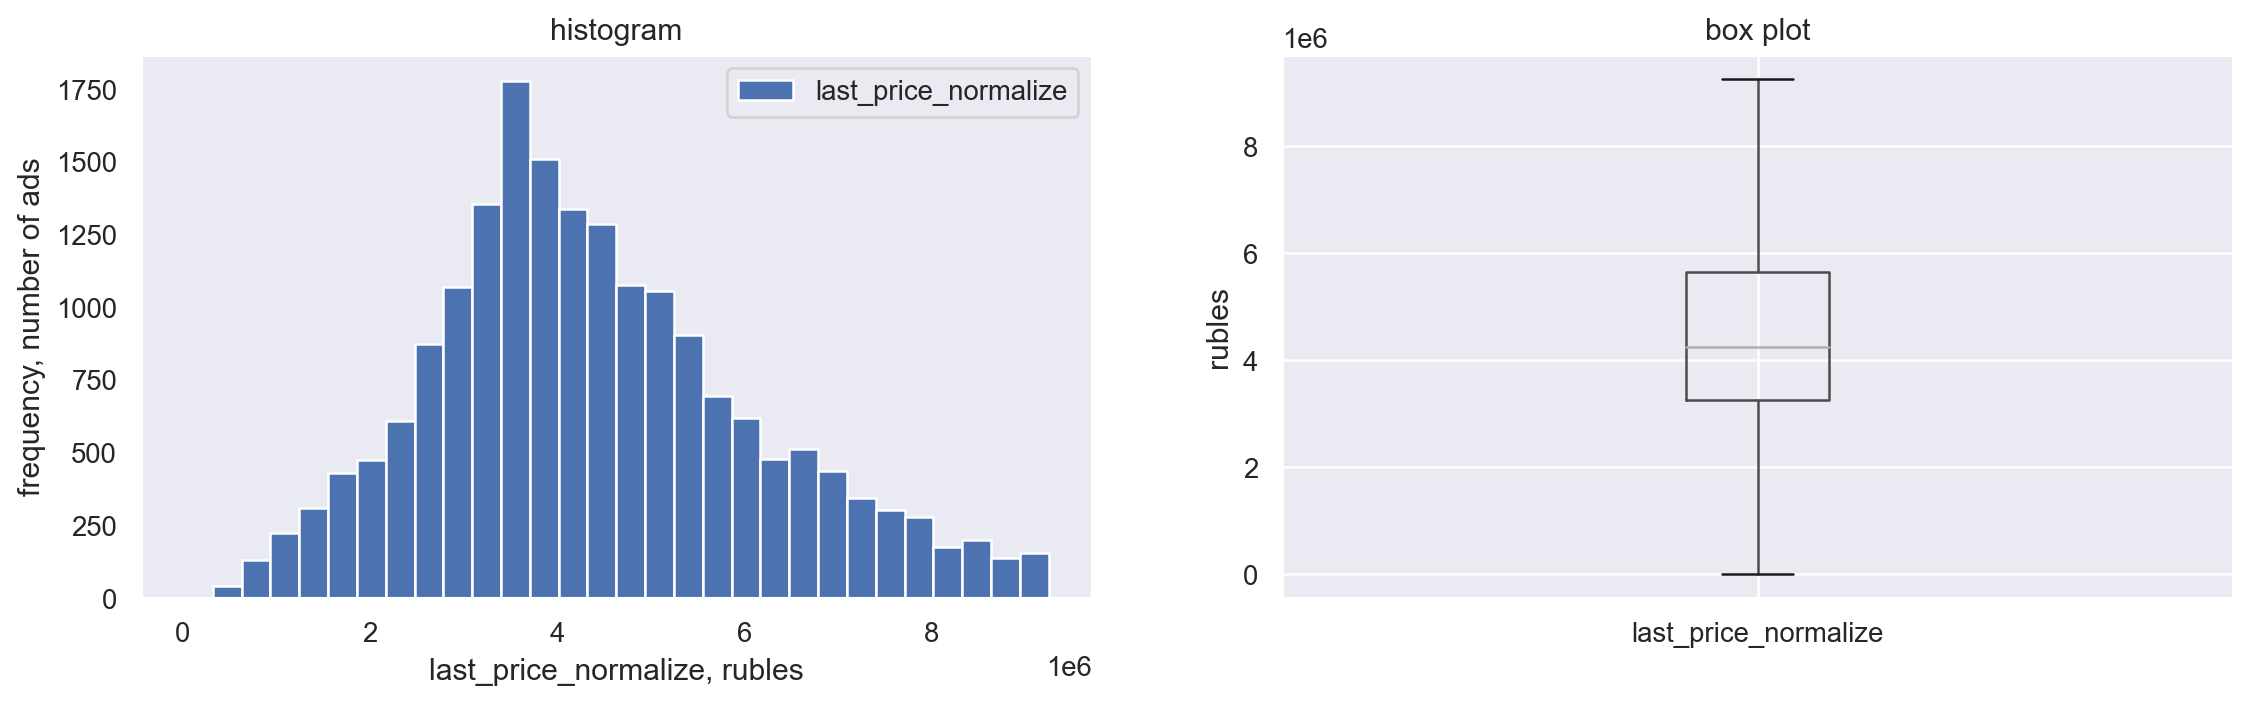

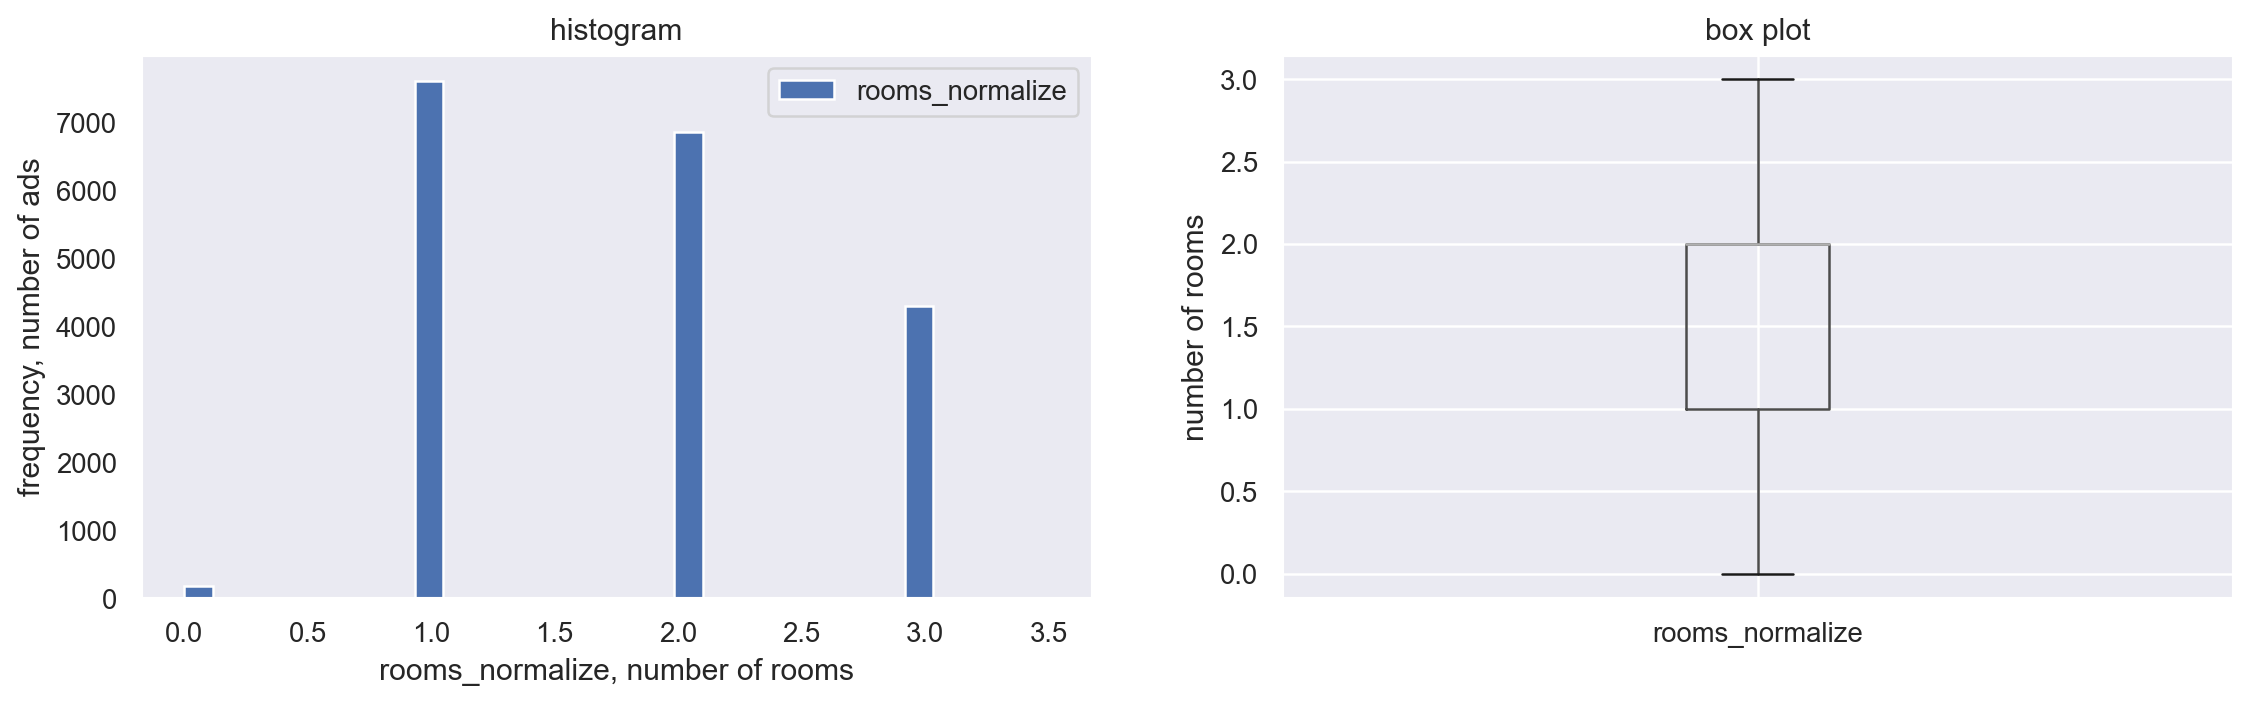

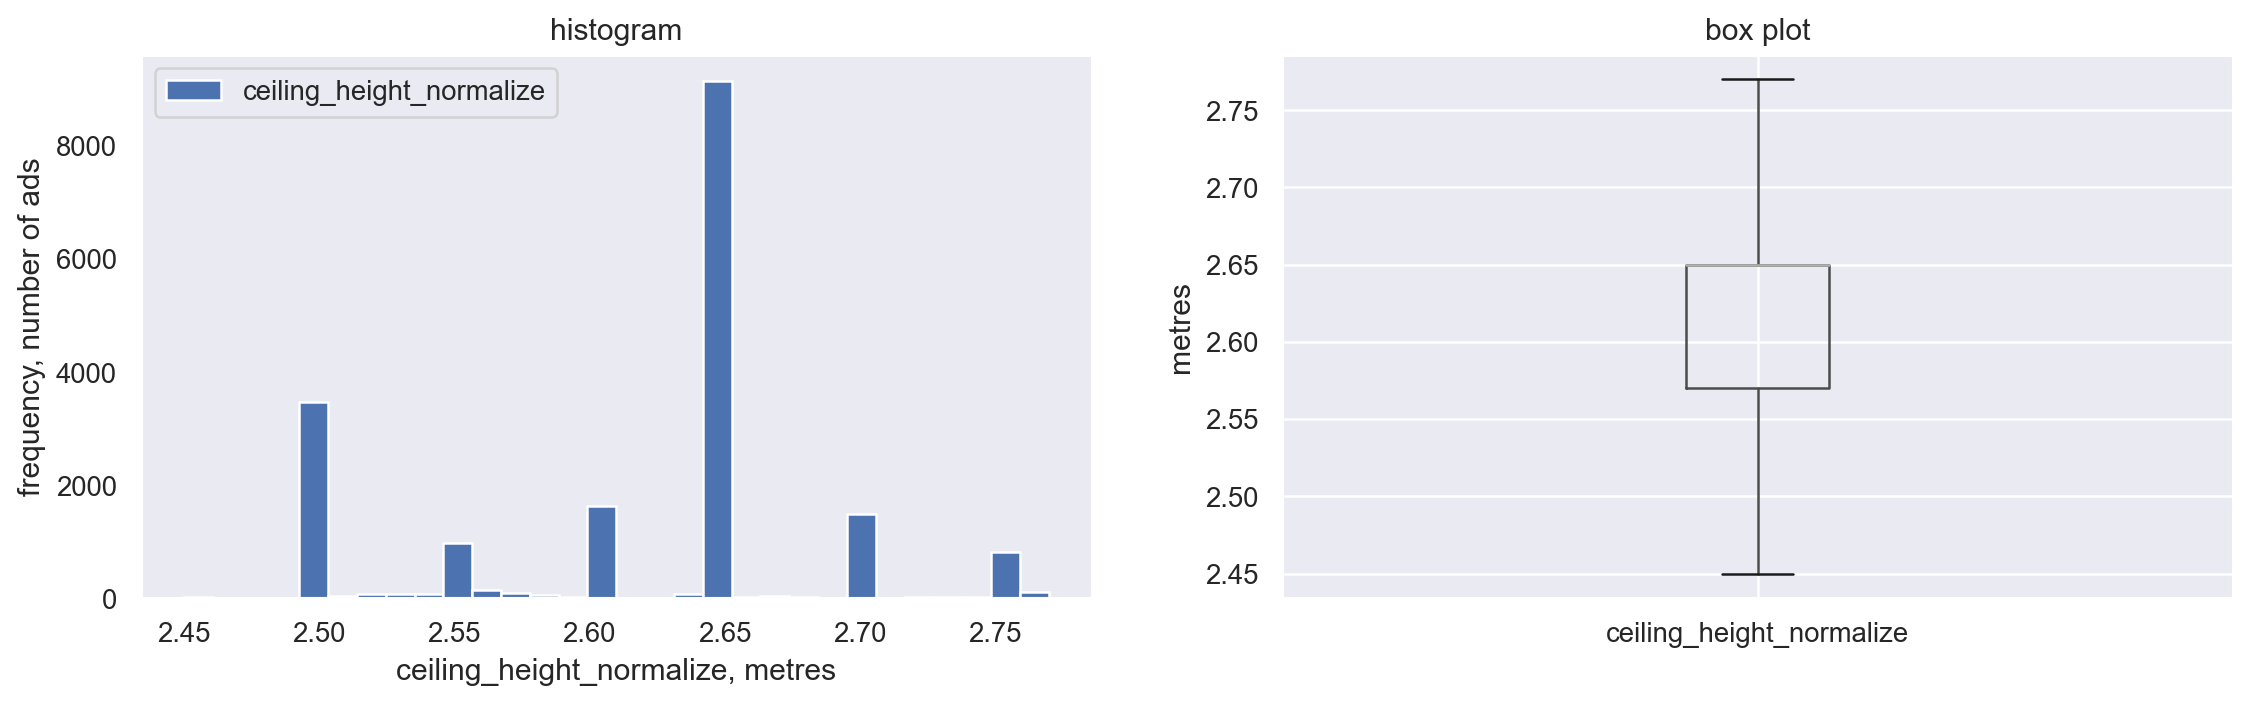

In [64]:
draw_plot(df, dict_of_normalize_columns)

In [65]:
df['days_exposition_normalize'].median()

87.0

Как видно из диаграмм, средние значения снилизись после удаления выбросов. 

В целом, наибольшая общая площадь осталась в пределах 40-50 кв. м, цена продажи на уровне от 3 до 5 млн, количество комнат все так же преобладает 1,2,3 - комнатные квартиры, высота потолков на уровне 2,5 - 2,65 м. 

На времени продажи квартиры появился провал около 45-50 дней с момента размещения, это связано с площадками, которые ограничивают время размещения объявления 45 дневным периодом, а среднее время размещения уменьшилось до 87 дней.

### Изучение зависимости между ценой и параметрами квартиры

Изучим, какие факторы влияют на стоимость квартиры, для этого посмотрим есть ли зависимость между:
* ценой и площадью
* ценой и числом комнат
* ценой и удаленностью от центра

In [66]:
df['total_area_rounded'] = round(df['total_area_normalize'], 0)
df['total_area_rounded'] = df['total_area_rounded'].astype(int)

Добавим подсчет корреляции:

In [67]:
def det_corr(data, column_x, column_y, _round = 3):
    return round(data[column_x].corr(data[column_y]), _round)

Автоматизируем отрисовку графиком через функцию:

In [68]:
def draw_hexbin(data, columns_x, column_y, _gridsize = 20):
    for column_x, size_data in columns_x.items():
        data.plot(
            x = column_x, 
            y = column_y, 
            kind = 'hexbin', 
            gridsize = _gridsize, 
            figsize = (10,8), 
            sharex=False, 
            grid = True)
        plt.xlabel(column_x + ', ' + size_data)
        plt.ylabel(column_y)
        plt.show()
        print(f"Корреляция между {column_x} и {column_y} = {det_corr(data, column_x, column_y)}")

Прежде, чем строить зависимости, следует отфильтровать последний столбец `cityCenters_nearest`, в прошлых шагах мы заполнили значения маркером. 

Добавим значения без маркера в новый столбец `cityCenters_nearest_normalize`:

In [69]:
df['cityCenters_nearest_normalize'] = df.loc[df['cityCenters_nearest'] <= 70000, 'cityCenters_nearest']

Построим графики зависимости, а также корреляцию:

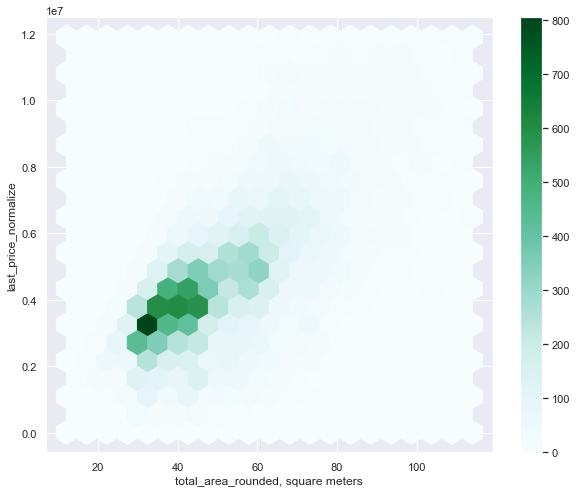

Корреляция между total_area_rounded и last_price_normalize = 0.679


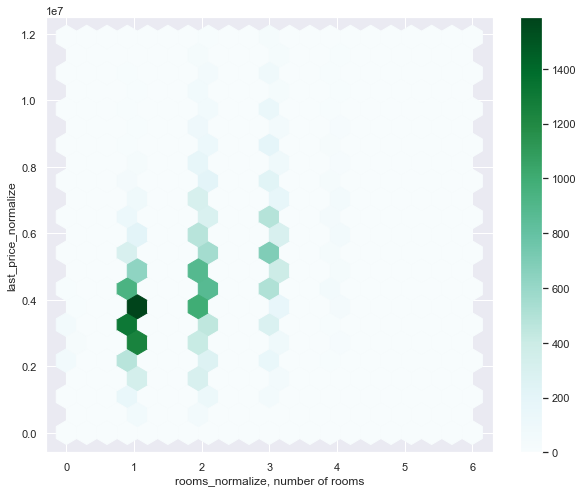

Корреляция между rooms_normalize и last_price_normalize = 0.413


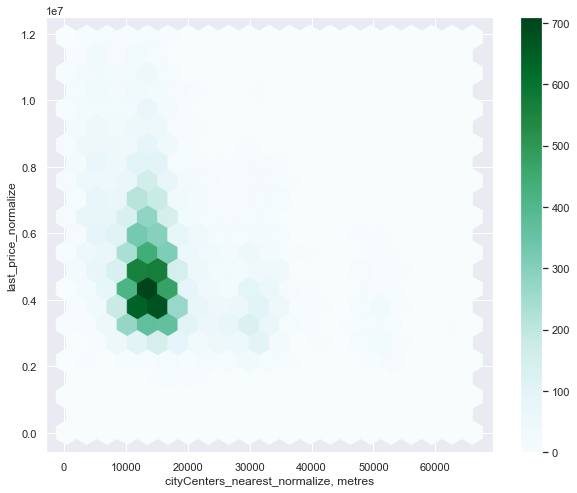

Корреляция между cityCenters_nearest_normalize и last_price_normalize = -0.306


In [70]:
columns_x = {'total_area_rounded': 'square meters', 'rooms_normalize': 'number of rooms', 'cityCenters_nearest_normalize': 'metres'}
column_y = 'last_price_normalize'

draw_hexbin(df, columns_x, column_y)

Как видно из графиков:
* цена и площадь квартиры связаны - при увеличиении площади, увеличивается и стоимоисть (что логично), о чем сообщает так же коэффициент корреляции.

* цена и количество комнат так же имеют зависимость (конечно, если же площадь зависит от цены, логично, что и количество комнат тоже будут влиять на цену :) ), хотя коэффициент корреляции не такой сильный

* цена и расположение к центру города слабо выражены, хотя по графику видно, что с уменьшением расстояния цена возрастает (о чем кстати говорит и слабая отрицательная корреляция)

Изучим зависимость стоимости квартиры от распложения в доме (первый этаж, последний, другой):

In [71]:
def draw_floor_bar(data):
    (data
        .pivot_table(index = 'floor_type', values = 'last_price_normalize', aggfunc='median')
        .sort_values(by='last_price_normalize')
        .plot(y='last_price_normalize', kind = 'bar', figsize=(7,7), grid=True)
    )
    plt.show()

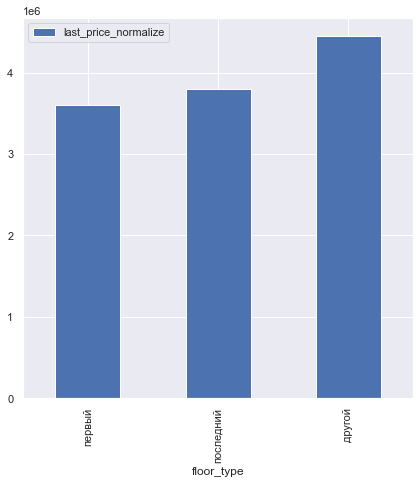

In [72]:
draw_floor_bar(df)

Можно сделать вывод, что цены ниже всего на первый и последний этаж - такие результаты можно понять, мало кто хочет покупать квартиру на этаже, где либо по ночам могут постучать в окно, либо ходить над головой, когда зимой чистят крышу / жариться в летнее время от испарения, поэтому нужно повышать спрос более низкой ценой.
                                                                    
                                                 (c) боль из личного опыта жизни как на первом, так и на последнем этажах :(

Исследуем зависимость от цены от даты размещения: год, месяц и дня недели:

In [73]:
def draw_bar(data, column_x, column_y):
    (
        data
        .sort_index()
        .pivot_table(index = column_x, values = column_y, aggfunc='count')
        .sort_values(by=column_y)
        .plot(kind = 'bar')
    )
    plt.ylabel('frequency')
    plt.title(column_x)
    plt.show()

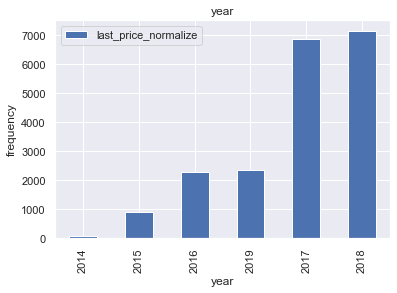

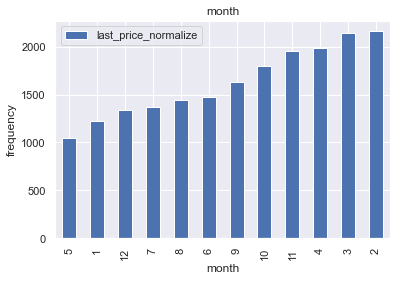

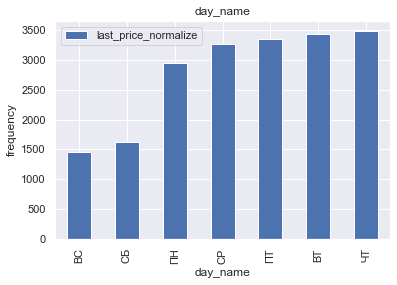

In [74]:
columns_x = ['year', 'month', 'day_name']
column_y = 'last_price_normalize'

for column_x in columns_x:
    draw_bar(df, column_x, column_y)

Исследовав графики, можно сказать, что больше всего продаж приходится на:
* 2017 и 2018 годах
* февраль и ноябрь
* четверг и пятницу

### Анализ 10 населенных пунктов с наибольшим числом объявлений

Выберем 10 населенных пунктов с наибольшим числом объявлений, для этого отфильтруем столбец `locality_name` и оставим только названия населенных пунктов без обозначений (село, поселок, деревня и т.д.)

In [75]:
df['locality_name_n'] = df['locality_name'].progress_apply(lambda x: str(x).split())

100%|████████████████████████████████████████████████████████████████████████| 19561/19561 [00:00<00:00, 219920.87it/s]


In [76]:
def fun1(loc_list):
    if len(loc_list) >=3:
        return loc_list
    
df['count_loc'] = df['locality_name_n'].progress_apply(fun1)

100%|████████████████████████████████████████████████████████████████████████| 19561/19561 [00:00<00:00, 271848.79it/s]


In [77]:
df['count_loc'].count()

762

In [78]:
df['locality_name_normalize'] = df['locality_name'].progress_apply(lambda x: str(x).split()[-1])

100%|████████████████████████████████████████████████████████████████████████| 19561/19561 [00:00<00:00, 219934.43it/s]


Теперь выведем 10 населенных пунктов с наибольшим числом объявлений и среднюю цену квадратного метра в этих населенных пунктах:

In [79]:
(df
    .pivot_table(index='locality_name_normalize', values = 'price_metr', aggfunc=['count', 'median'])
    .sort_values(by=('count', 'price_metr'), ascending = False)
    .head(10)
)

,count,median
,price_metr,price_metr
locality_name_normalize,,
Санкт-Петербург,12074,101554.0
Мурино,583,86119.0
Кудрово,466,95675.5
Шушары,434,76667.0
Всеволожск,380,65789.0
Парголово,326,91780.5
Колпино,315,74733.0
Пушкин,300,98045.5


По данным таблицы можно отметить следующее:
* `Санкт-Петербург` самый наибольший город по количеству объявлений, а также по стоимости жилья за кв. метр,
* `Выборг` нечасто встречаемый среди объявлений, а также дешевый по стоимости жилья за кв. метр.

### Анализ изменения цены по степени удаленности от центра

Выделим квартиры из Санкт-Петербурга:

In [80]:
Spb = df.query('locality_name == "Санкт-Петербург"')

Переведем значения в `cityCenters_nearest_normalize` из м в км с округлением до целого:

In [81]:
Spb['cityCenters_nearest_normalize_km'] = round(Spb['cityCenters_nearest_normalize'] / 1000, 0)

Подсчитаем цену каждого км:

In [82]:
Spb['price_km'] = Spb['last_price_normalize'] / Spb['cityCenters_nearest_normalize_km']

После чего разделим на отрезки для построения графика:

In [83]:
Spb['cityCenters_nearest_normalize_qkm'] = pd.cut(Spb['cityCenters_nearest_normalize_km'], [0,2,4,8,10,12,15,20,40,100])

Построим bar, где по Х - расстояние до центра, а по Y - медиана стоимости недвижимости:

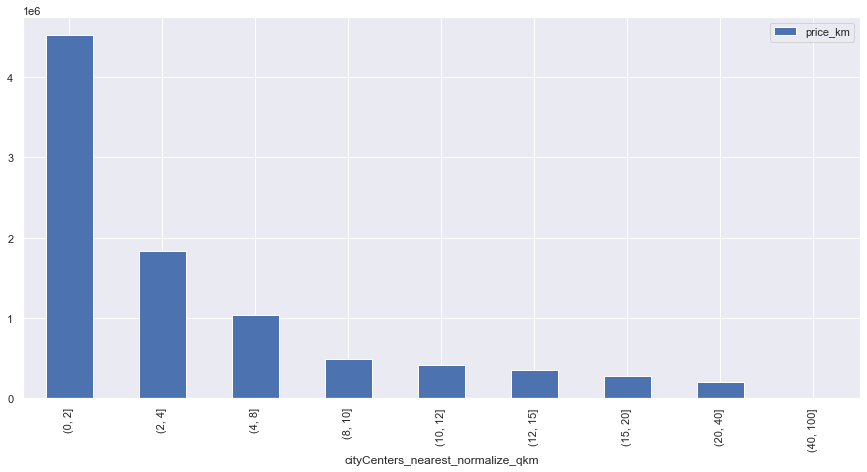

In [84]:
(Spb
    .groupby('cityCenters_nearest_normalize_qkm')
    .agg({'price_km':'median'})
    .sort_values(by='cityCenters_nearest_normalize_qkm')
    .plot(kind='bar', figsize=(15,7))
)
plt.show()

По графику видно, что после 8 км, цена падает почти в половину, что наводит на мысль - 8 км это радиус центра.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир в центре, для этого в `Spb` внесем столбец-макер находится ли квартира в центре города или нет:

In [85]:
def is_center(row):
    if row['cityCenters_nearest_normalize_km'] <= 8:
        return True
    else:
        return False

In [86]:
Spb['center_marker'] = Spb.progress_apply(is_center, axis = 1)

100%|█████████████████████████████████████████████████████████████████████████| 12074/12074 [00:00<00:00, 21307.80it/s]


In [87]:
Spb_center = Spb.query('center_marker == True')

Проанализируем эту территорию и изучим следующие параметры:

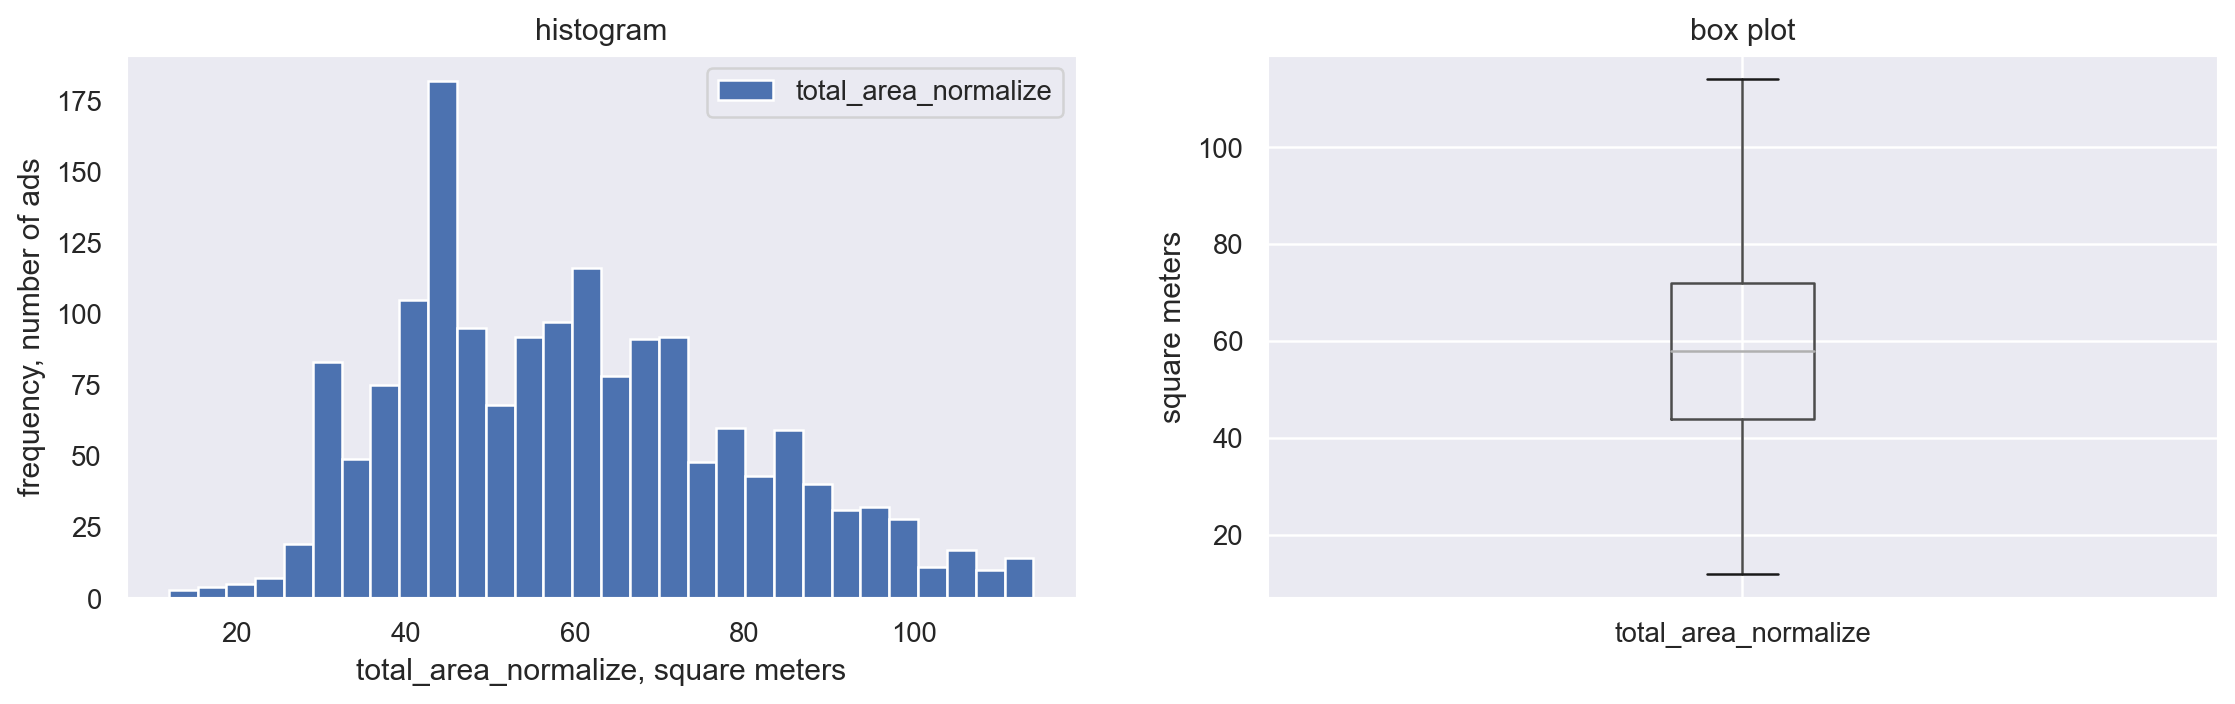

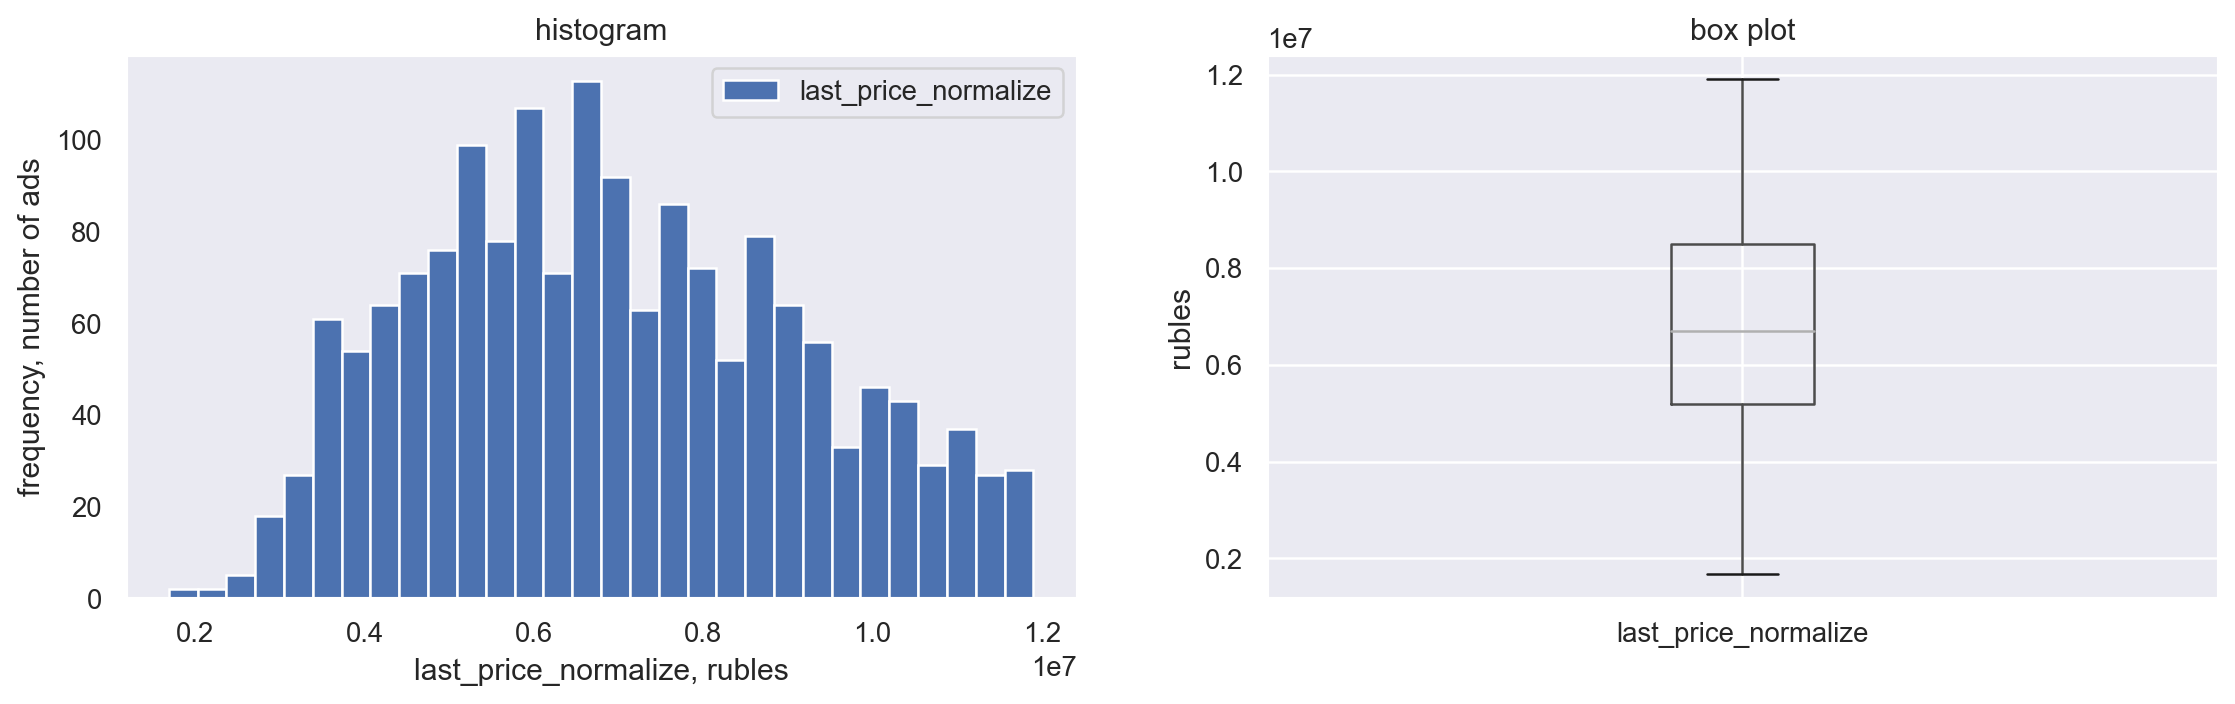

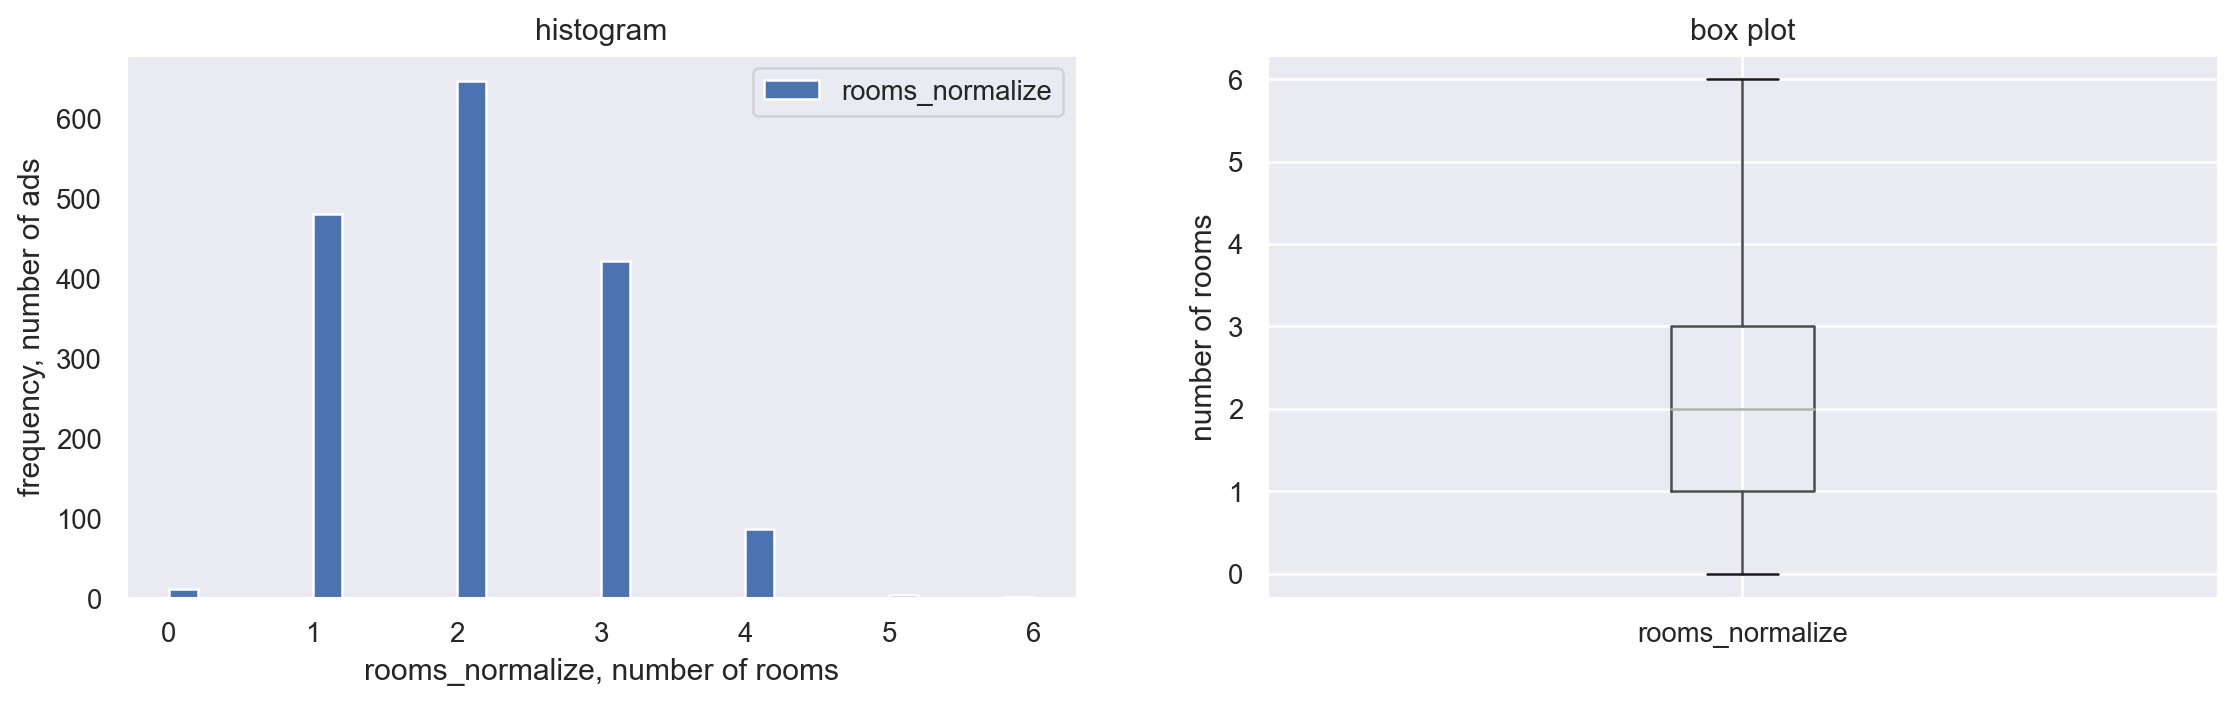

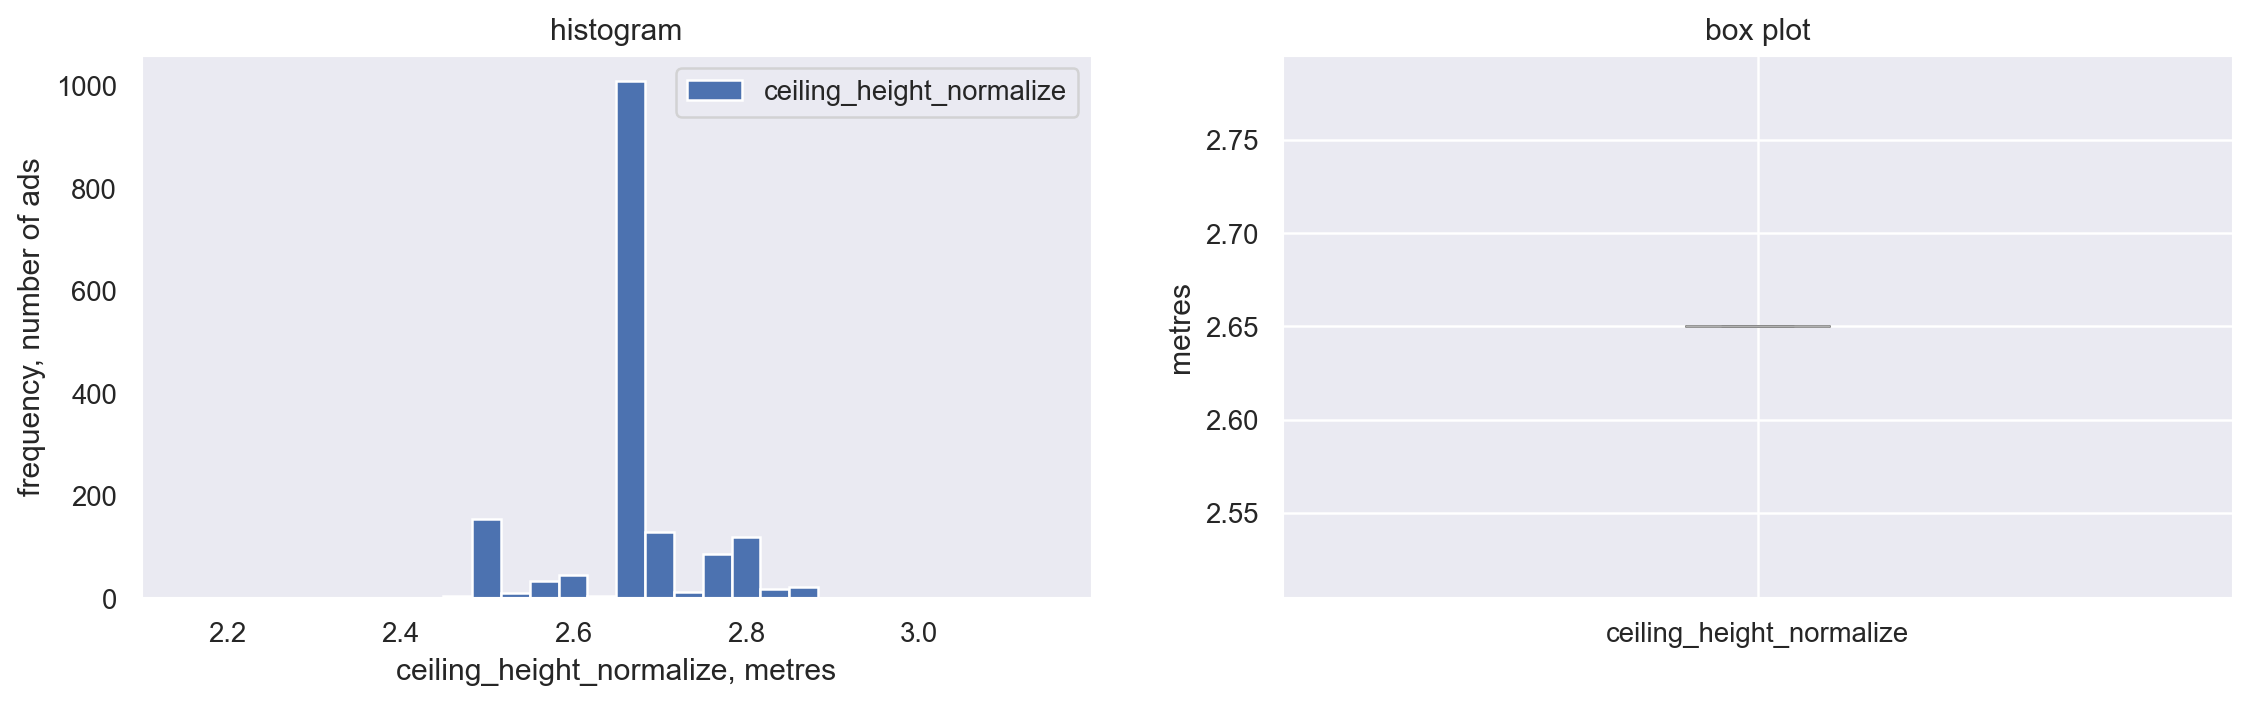

In [88]:
draw_plot(Spb_center, {'total_area_normalize': 'square meters', 'last_price_normalize': 'rubles', 'rooms_normalize': 'number of rooms', 'ceiling_height_normalize': 'metres'})

Как можно увидеть, в центре Санкт-Петербурга преобладают 2 комнатные квартиры, а также к графикам добавились 4-х комнатные квартиры, что за собой и потянуло скачок на графике площади, среднее значение приблизилось к 60 кв. м.

Выделим такие факторы, как число комнат, этаж, удаленность от центра, дата размещения объявления, которые могут влиять на стоимость квартиры в центре Санкт-Петербурга:

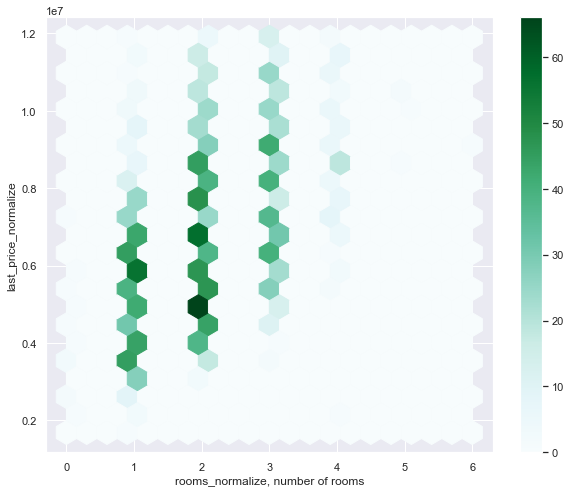

Корреляция между rooms_normalize и last_price_normalize = 0.454


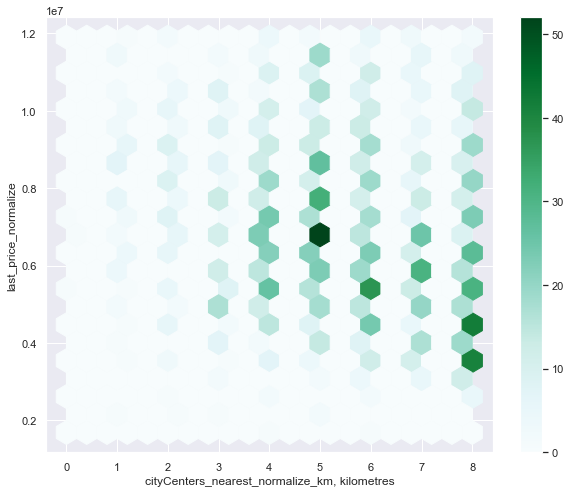

Корреляция между cityCenters_nearest_normalize_km и last_price_normalize = -0.177


In [89]:
columns_x = {'rooms_normalize': 'number of rooms', 'cityCenters_nearest_normalize_km': 'kilometres'}
column_y = 'last_price_normalize'

draw_hexbin(Spb_center, columns_x, column_y)

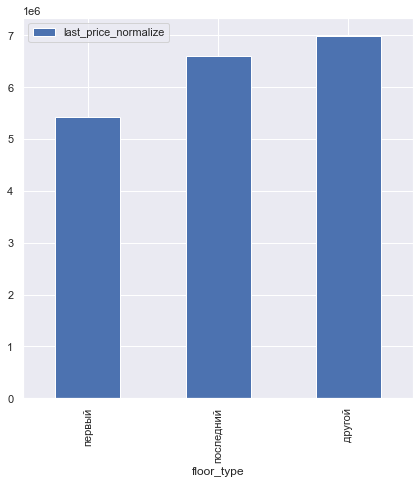

In [90]:
draw_floor_bar(Spb_center)

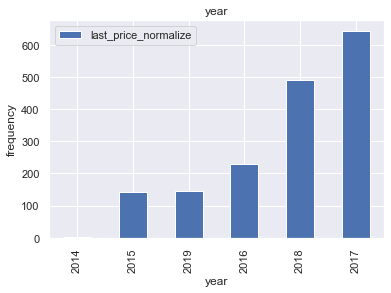

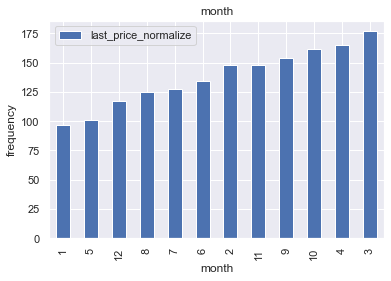

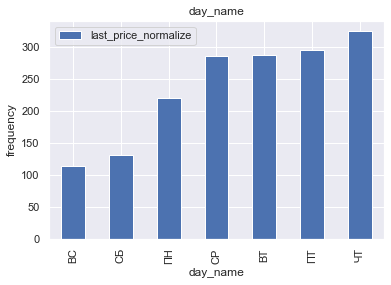

In [91]:
columns_x = ['year', 'month', 'day_name']
column_y = 'last_price_normalize'

for column_x in columns_x:
    draw_bar(Spb_center, column_x, column_y)

### По всему городу

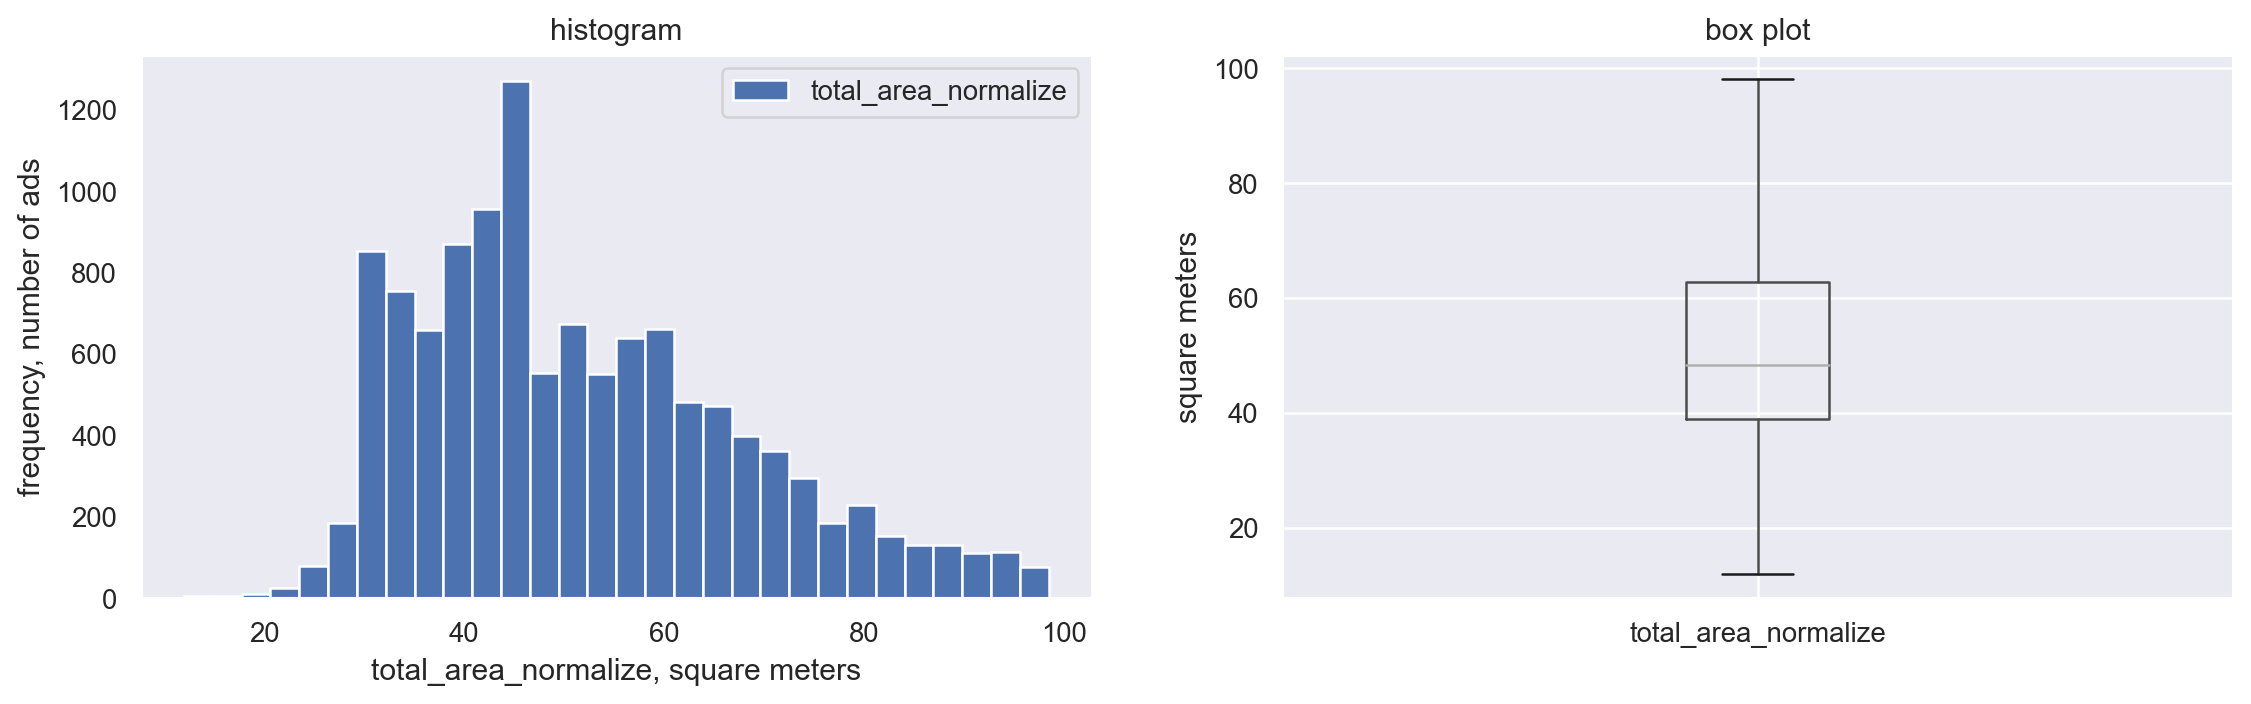

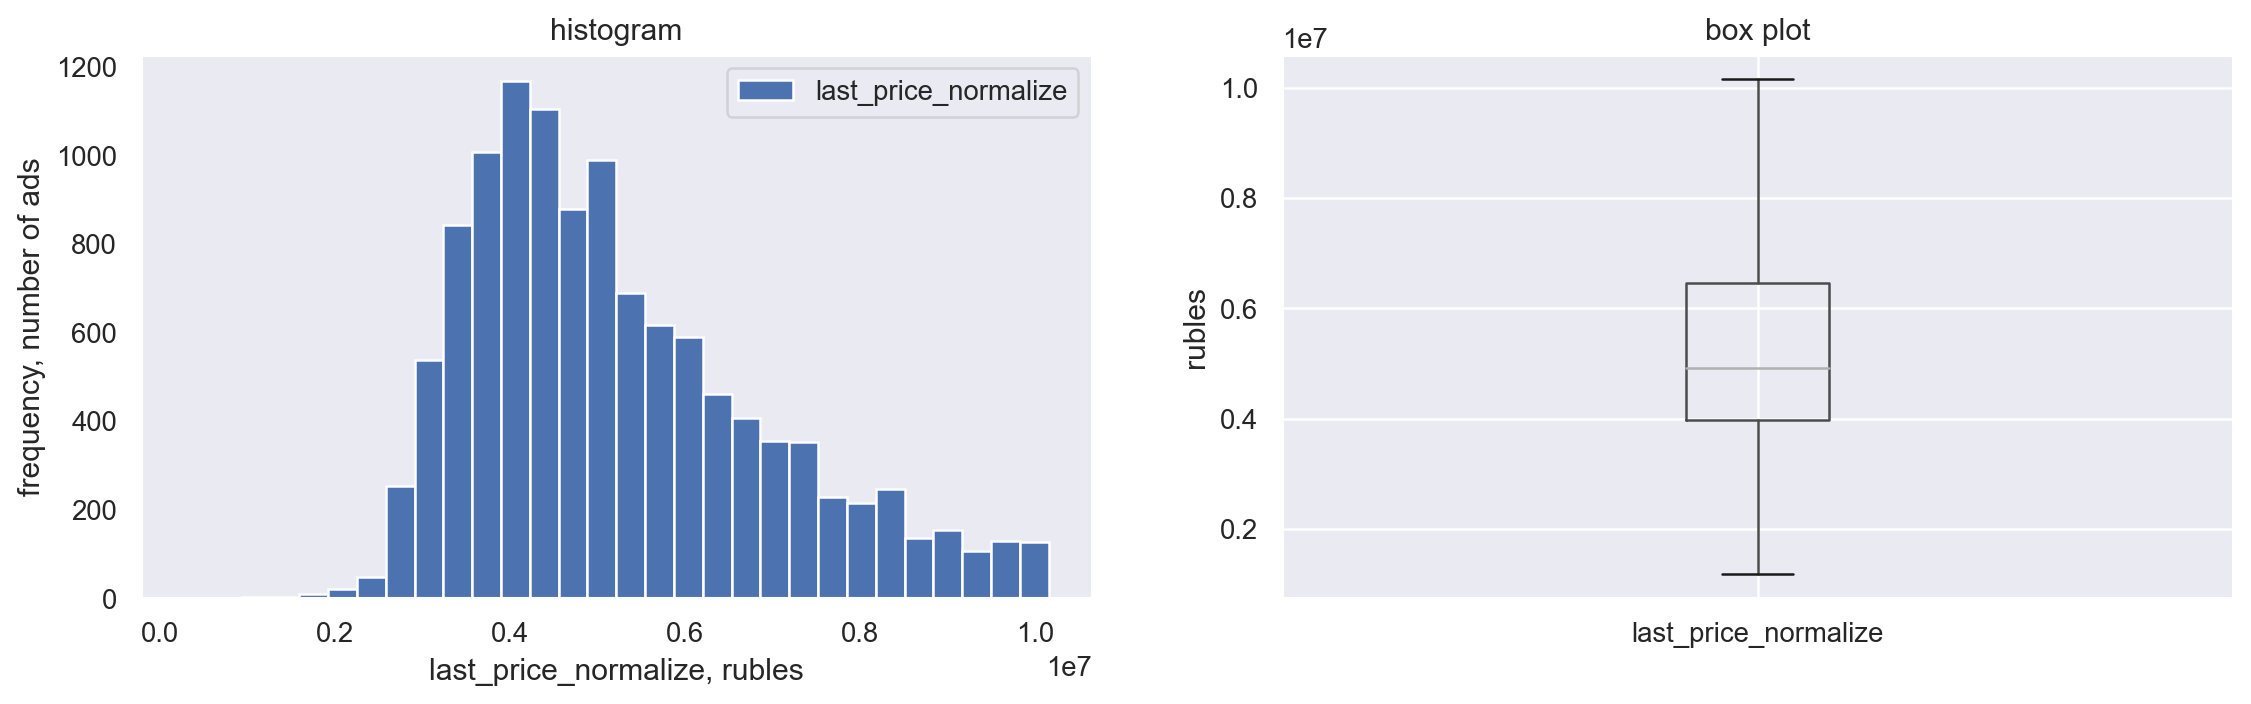

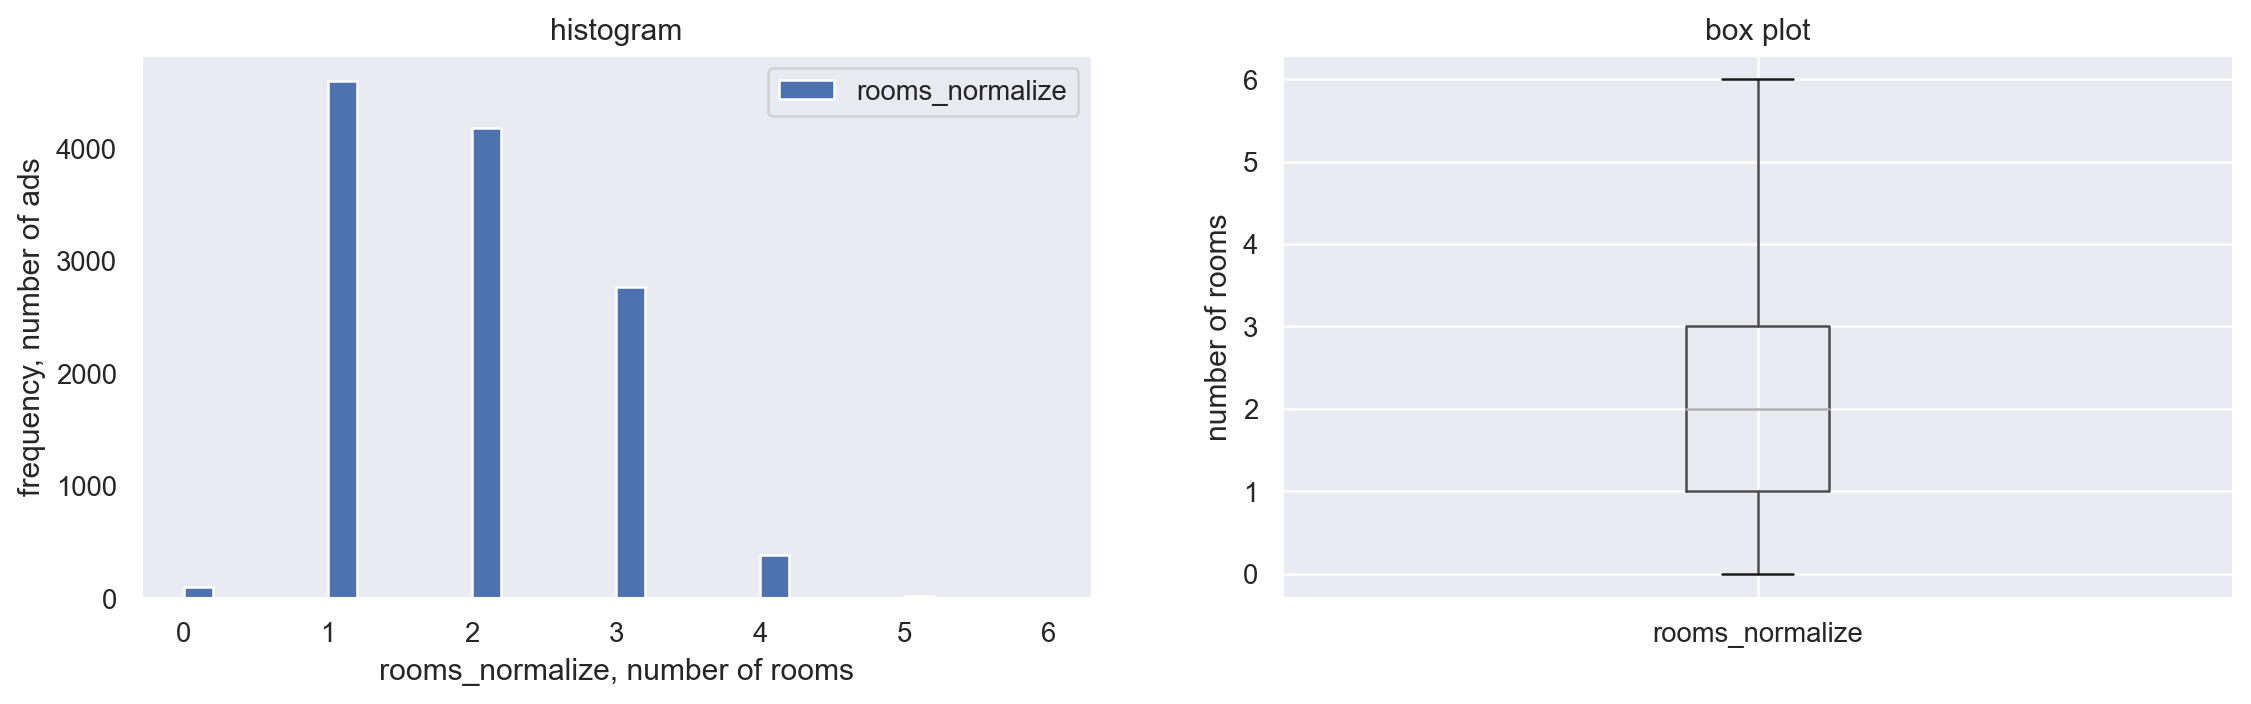

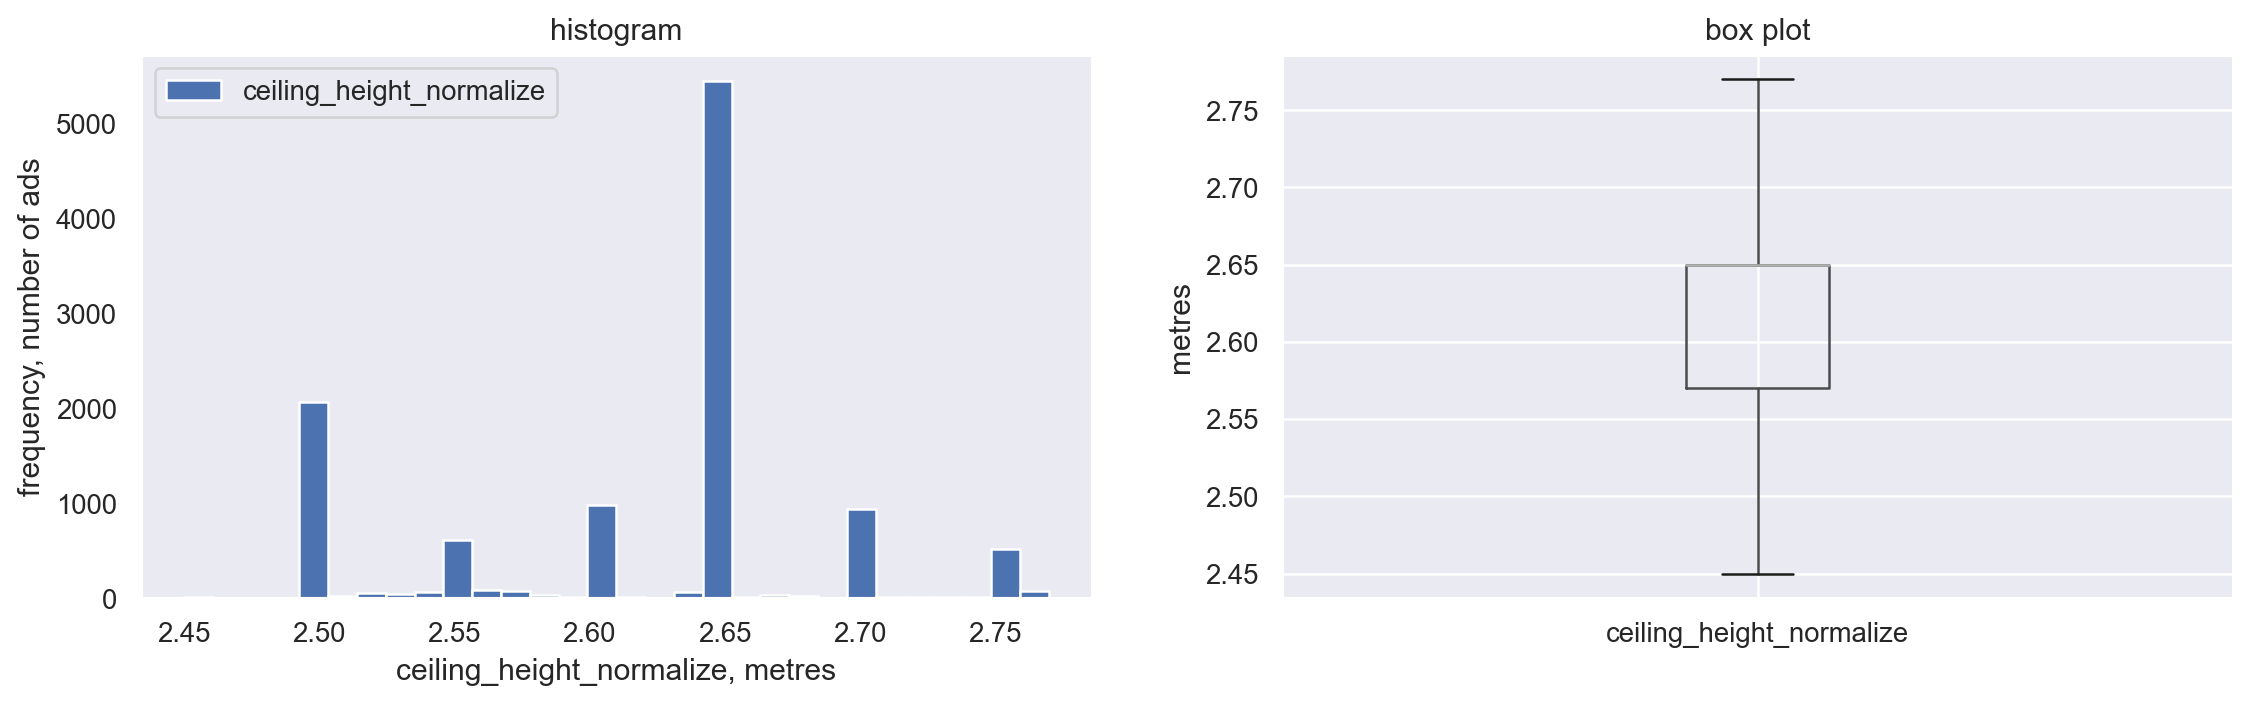

In [92]:
dict_data = {'total_area_normalize':'square meters', 'last_price_normalize':'rubles', 'rooms_normalize':'number of rooms', 'ceiling_height_normalize':'metres'}
draw_plot(Spb, dict_data)

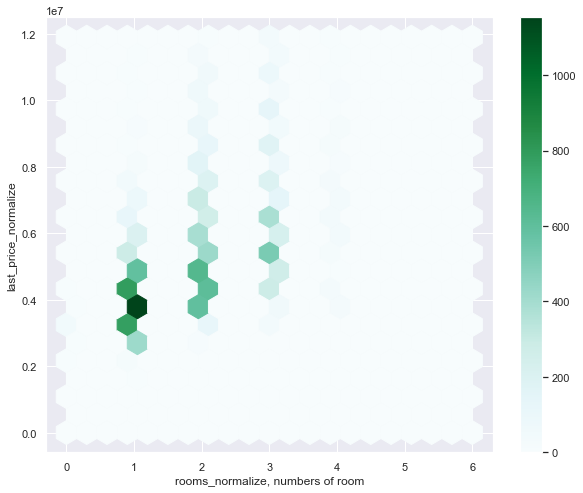

Корреляция между rooms_normalize и last_price_normalize = 0.487


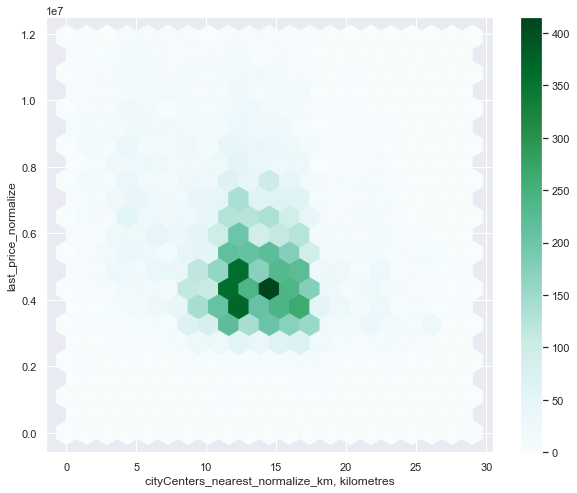

Корреляция между cityCenters_nearest_normalize_km и last_price_normalize = -0.278


In [93]:
columns_x = {'rooms_normalize':'numbers of room', 'cityCenters_nearest_normalize_km':'kilometres'}
column_y = 'last_price_normalize'

draw_hexbin(Spb, columns_x, column_y)

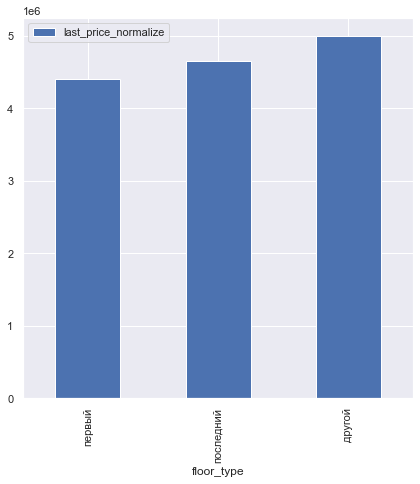

In [94]:
draw_floor_bar(Spb)

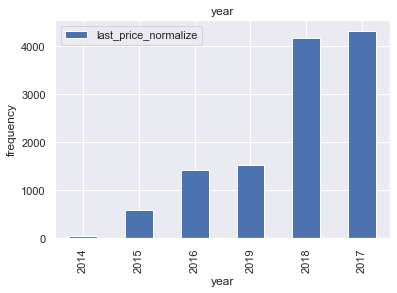

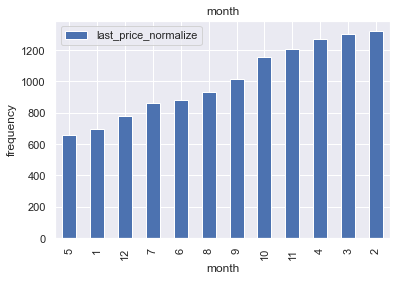

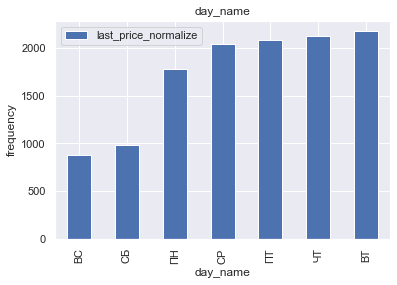

In [95]:
columns_x = ['year', 'month', 'day_name']
column_y = 'last_price_normalize'

for column_x in columns_x:
    draw_bar(Spb, column_x, column_y)

В целом преобладают объявления на границе центра Санкт-Петербурга (что мы и увидели), в центре жилья осталось мало, это и логично. 

Предпочтения в расположении квартиры (первый этаж, последний, другой) никак не изменилось - в любом случае первый и последний этаж - не очень и привлекают.

Количество комнат тоже разнится: при строительстве центра Санкт-Петербурга делали упор на большое количество комнат в квартирах, в отличии, чем сейчас делают упор на 1-2 комнатные квартиры (конечно, они дешевле, а значит доступнее и спрос будет выше).

В связи с изменением (уменьшением) количества комнат, медиана общей площади жилья также изменилась в меньшую сторону.

## 5. Общий вывод

Проанализировав данные, можно сказать, что мы завершили наше исследование объявлений по продаже квартир. Стоит отметить, что из данных мы убрали выбросы (дорогую недвижимость с огромной площадью, которая негативно влияла на результаты исследования), в итоге мы получили только "средние" значения, которые соответствуют для квартир региона.

Самая часто встречаемая площадь квартиры в регионе - 40-50 кв.м, количество комнат в среднем от 1 до 4, а высота потолков от 2.5 м до 2.65 м, стоимость квартиры варьируется от 3 до 5 млн. руб. На сайте объявления о продаже квартиры висят в среднем 87 дней и есть провалы около 45 дней (это связано с площадками, которые ограничивают время размещения объявления 45 дневным периодом). Небольшим спросом пользуются квартиры первого и последнего этажа - вне зависимости от расположения (центр города или нет). Наибольший пик продаж квартир приходится на 2017-2018 года, если изучить данные, то по сведеньям так и выходит, в этих годах было больше всего новостроек.

В заключении можно сказать, что для всех объявлений прослеживается положительная корреляция между ценой и площадью/количеством комнат в квартире, этаж как снижающий цену фактор и зависимость цены от удаленности квартиры от центра города - за радиусом 8 км от Санкт-Петербурга цена падает почти вдвое, по сравнению с квартирами, которые находятся на границе центра города.